## **How to increase Cross-Selling of Banking Products**




**Name**: Cross selling Exploratory Data Analysis and Recommendation

**Report date**: August 14, 2021
 
**Email**: peterkin_nicolette@yahoo.com 

**Country**: Jamaica 

**Specialization**: Data Analyst 

**Group Name**: Dynasty 


**Problem description**: 

Changing to a new selling technique requires a lot of research and data analyzing to ensure that the right cross selling strategy is used to re-enter the market. The issue XYZ credit union is having currently is that they do not know what actions to take in order to increase cross selling in the credit union. 


**Business Understanding**:

Our goal is to create an exploratory data analysis for XYZ credit unions’ dataset and create a cross-selling plan solution. The EDA report will be specific and meaningful so there is no room for assumptions. As the data analyst assigned to this project my job is to analyze the given data with much scrutiny in order to provide XYZ credit union with vital insights on cross
selling. Once the exploratory data analyze report is completed XYZ credit union will have actionable insights which can then be used to inform their cross-selling campaigns.


*Loading the nesscessary libaries.*

In [1]:
import zipfile
with zipfile.ZipFile('./cross_selling.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [1]:
# import packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as st
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,roc_curve,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

*Here we are setting up the configuration and utility files.*

In [5]:
%%writefile configuration.yaml
file_type: csv
dataset_name: train
file_name: Train
table_name: train_data
inbound_delimiter: ","
outbound_delimiter: "|"
skip_leading_rows: 1
columns:

Overwriting configuration.yaml


In [6]:
%%writefile utility.py
import math
import logging
import os
import subprocess
import yaml
import pandas as pd
import datetime 
import gc
import re
import gzip
import shutil
import numpy as np
import seaborn as sns

################
# File Reading #
################

def read_config_file(filepath):
    with open(filepath, 'r') as stream:
        try:
            return yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            logging.error(exc)


Writing utility.py


*Here we are loading the Train Dataset.*

In [2]:
import pandas as pd
import utility as util

# Read config file
config_data = util.read_config_file("configuration.yaml")

# read the file using config file
file_type = config_data['file_type']
source_file = "./" + config_data['file_name'] + f'.{file_type}'

pd.set_option('display.max_columns',None)

#print("",source_file)
df = pd.read_csv(source_file,config_data['inbound_delimiter'])

/Users/dimitriharding/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/dimitriharding/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Data Understanding**

In [ ]:
# Total missing values for each feature
print(df.isnull().sum())

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

##### The code ran above is to find out what are the missing values in the dataset.

In [ ]:
# Data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

##### The dataframe consist of eight(8) floats64, twenty-three(23) int64 and seventeen(17) object.
                              


In [ ]:
# show rows with missing value for ind_empleado
df[df['ind_empleado'].isnull()]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
261,2015-01-28,1050741,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1029,2015-01-28,1051017,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1063,2015-01-28,1051064,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1154,2015-01-28,1051387,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1779,2015-01-28,1048660,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775976,2015-06-28,550081,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,1,0,0,0,NaN,NaN,0
3776175,2015-06-28,550693,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,1,0,0,0,NaN,NaN,0
3776230,2015-06-28,549518,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,1,0,0,0,NaN,NaN,0
3776279,2015-06-28,549207,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,1,0,0,0,NaN,NaN,0


##### The table above shows that there are NA and NAN values that we will need to clean later in our EDA.

In [ ]:
df1 = df[df.isna().any(axis=1)]
print(df1);

          fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  \
0         2015-01-28   1375586            N              ES    H   35   
1         2015-01-28   1050611            N              ES    V   23   
2         2015-01-28   1050612            N              ES    V   23   
3         2015-01-28   1050613            N              ES    H   22   
4         2015-01-28   1050614            N              ES    V   23   
...              ...       ...          ...             ...  ...  ...   
13647304  2016-05-28   1166765            N              ES    V   22   
13647305  2016-05-28   1166764            N              ES    V   23   
13647306  2016-05-28   1166763            N              ES    H   47   
13647307  2016-05-28   1166789            N              ES    H   22   
13647308  2016-05-28   1550586            N              ES    H   37   

          fecha_alta  ind_nuevo antiguedad  indrel  ... ind_hip_fin_ult1  \
0         2015-01-12        0.0          6     

In [ ]:
# Unique customer code - skew
print(df.ncodpers.nunique())

956645


##### The code shows that there are alot of duplicates in the dataset.

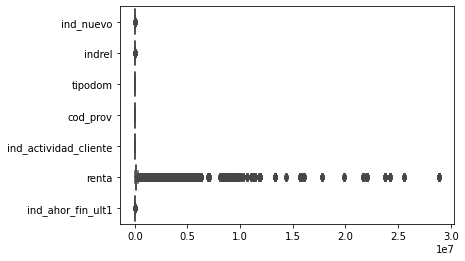

In [ ]:

# Outliner
sns.boxplot(data = df[['ind_nuevo', 'indrel', 'tipodom', 'cod_prov', 'ind_actividad_cliente', 'renta', 'ind_ahor_fin_ult1']], palette= "rainbow", orient= 'h');

##### From the above graph it is evident that the dataset has outliers.

### In order to overcome some of the NA values we will use the mean value to fill in the missing information and for the ones thats we are unable to fill we will remove them. 
### For duplicate values we will remove them as they are not needed in the dataset.
###Also we intend on removing the outliers in the dataset as they will not change the actionable insights gained from the dataset. 

### **Data Cleaning and Transformation**

In [4]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include = 'all')

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07,1.364731e+07,1.364731e+07,1.364731e+07,...,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.363125e+07,1.363125e+07,1.364731e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05,1.022912e-04,2.315475e-05,6.554837e-01,...,5.886582e-03,9.170965e-03,2.627404e-03,5.253636e-02,4.438868e-02,2.560761e-02,3.847718e-03,5.472434e-02,5.942854e-02,1.279162e-01
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05,1.011340e-02,4.811883e-03,4.752103e-01,...,7.649791e-02,9.532502e-02,5.119083e-02,2.231060e-01,2.059571e-01,1.579616e-01,6.191053e-02,2.274414e-01,2.364250e-01,3.339965e-01
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

ind_empleado: 99.73378%
N      13610977
NaN       27734
B          3566
F          2523
A          2492
S            17
Name: ind_empleado, dtype: int64

pais_residencia: 99.31416%
ES     13553710
NaN       27734
FR         5161
AR         4835
DE         4625
         ...   
ZW           11
DJ           11
JM           11
BM            6
MT            2
Name: pais_residencia, Length: 119, dtype: int64

indrel: 99.61511%
1.0     13594782
NaN        27734
99.0       24793
Name: indrel, dtype: int64

ult_fec_cli_1t: 99.81833%
NaN           13622516
2015-12-24         763
2015-12-28         521
2015-07-09         443
2015-07-06         405
                ...   
2016-04-28          44
2015-08-19          44
2015-08-06          41
2016-01-04          34
2015-12-23          27
Name: ult_fec_cli_1t, Length: 224, dtype: int64

indresi: 99.31417%
S      13553711
N         65864
NaN       27734
Name: indresi, dtype: int64

indext: 95.07251%
N      12974839
S        644736
NaN       27734
Name: 

In [6]:
# display the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only display for the columns that have missing values.
        print(df[col].isnull())
        print('-------------------------------------------------------------')

0           False
1           False
2           False
3           False
4           False
            ...  
13647304    False
13647305    False
13647306    False
13647307    False
13647308    False
Name: ind_nuevo, Length: 13647309, dtype: bool
-------------------------------------------------------------
0           False
1           False
2           False
3           False
4           False
            ...  
13647304    False
13647305    False
13647306    False
13647307    False
13647308    False
Name: indrel, Length: 13647309, dtype: bool
-------------------------------------------------------------
0           False
1           False
2           False
3           False
4           False
            ...  
13647304    False
13647305    False
13647306    False
13647307    False
13647308    False
Name: tipodom, Length: 13647309, dtype: bool
-------------------------------------------------------------
0           False
1           False
2           False
3           False
4           

*Tells rows for each feature that has missing values (True) for numeric features*

In [7]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
# impute the missing values and create the missing value indicator variables for each numeric column.
for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)
        print(df[col])
        print('-------------------------------------------------------------')

imputing missing values for: ind_nuevo
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
           ... 
13647304    0.0
13647305    0.0
13647306    0.0
13647307    0.0
13647308    1.0
Name: ind_nuevo, Length: 13647309, dtype: float64
-------------------------------------------------------------
imputing missing values for: indrel
0           1.0
1           1.0
2           1.0
3           1.0
4           1.0
           ... 
13647304    1.0
13647305    1.0
13647306    1.0
13647307    1.0
13647308    1.0
Name: indrel, Length: 13647309, dtype: float64
-------------------------------------------------------------
imputing missing values for: tipodom
0           1.0
1           1.0
2           1.0
3           1.0
4           1.0
           ... 
13647304    1.0
13647305    1.0
13647306    1.0
13647307    1.0
13647308    1.0
Name: tipodom, Length: 13647309, dtype: float64
-------------------------------------------------------------
imputing missing values for: 

*Here we are using median to fill missing values*

In [ ]:
# display the missing values and create the missing value indicator variables for each non-numeric column.
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only display for the columns that have missing values.
        print(df[col].isnull())
        print('-------------------------------------------------------------')

0           False
1           False
2           False
3           False
4           False
            ...  
13647304    False
13647305    False
13647306    False
13647307    False
13647308    False
Name: ind_empleado, Length: 13647309, dtype: bool
-------------------------------------------------------------
0           False
1           False
2           False
3           False
4           False
            ...  
13647304    False
13647305    False
13647306    False
13647307    False
13647308    False
Name: pais_residencia, Length: 13647309, dtype: bool
-------------------------------------------------------------
0           False
1           False
2           False
3           False
4           False
            ...  
13647304    False
13647305    False
13647306    False
13647307    False
13647308    False
Name: sexo, Length: 13647309, dtype: bool
-------------------------------------------------------------
0           False
1           False
2           False
3           False
4  

*Tells rows for each feature that has missing values (True) for non-numeric features*

In [8]:
# impute the missing values and create the missing value indicator variables for each non-numeric column.
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)
        print(df[col])
        print('-------------------------------------------------------------')

imputing missing values for: ind_empleado
0           N
1           N
2           N
3           N
4           N
           ..
13647304    N
13647305    N
13647306    N
13647307    N
13647308    N
Name: ind_empleado, Length: 13647309, dtype: object
-------------------------------------------------------------
imputing missing values for: pais_residencia
0           ES
1           ES
2           ES
3           ES
4           ES
            ..
13647304    ES
13647305    ES
13647306    ES
13647307    ES
13647308    ES
Name: pais_residencia, Length: 13647309, dtype: object
-------------------------------------------------------------
imputing missing values for: sexo
0           H
1           V
2           V
3           H
4           V
           ..
13647304    V
13647305    V
13647306    H
13647307    H
13647308    H
Name: sexo, Length: 13647309, dtype: object
-------------------------------------------------------------
imputing missing values for: fecha_alta
0           2015-01-12
1     

*Here we are using mode to fill missing values*

In [9]:
# display any feature that has 100% missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

fecha_dato - 0%
ncodpers - 0%
ind_empleado - 0%
pais_residencia - 0%
sexo - 0%
age - 0%
fecha_alta - 0%
ind_nuevo - 0%
antiguedad - 0%
indrel - 0%
ult_fec_cli_1t - 0%
indrel_1mes - 0%
tiprel_1mes - 0%
indresi - 0%
indext - 0%
conyuemp - 0%
canal_entrada - 0%
indfall - 0%
tipodom - 0%
cod_prov - 0%
nomprov - 0%
ind_actividad_cliente - 0%
renta - 0%
segmento - 0%
ind_ahor_fin_ult1 - 0%
ind_aval_fin_ult1 - 0%
ind_cco_fin_ult1 - 0%
ind_cder_fin_ult1 - 0%
ind_cno_fin_ult1 - 0%
ind_ctju_fin_ult1 - 0%
ind_ctma_fin_ult1 - 0%
ind_ctop_fin_ult1 - 0%
ind_ctpp_fin_ult1 - 0%
ind_deco_fin_ult1 - 0%
ind_deme_fin_ult1 - 0%
ind_dela_fin_ult1 - 0%
ind_ecue_fin_ult1 - 0%
ind_fond_fin_ult1 - 0%
ind_hip_fin_ult1 - 0%
ind_plan_fin_ult1 - 0%
ind_pres_fin_ult1 - 0%
ind_reca_fin_ult1 - 0%
ind_tjcr_fin_ult1 - 0%
ind_valo_fin_ult1 - 0%
ind_viv_fin_ult1 - 0%
ind_nomina_ult1 - 0%
ind_nom_pens_ult1 - 0%
ind_recibo_ult1 - 0%
ind_nuevo_ismissing - 0%
indrel_ismissing - 0%
tipodom_ismissing - 0%
cod_prov_ismissing - 0

*Showing percentage of missing data per feature.*

In [10]:
# delete any feature that has 100% missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    percentage = round(pct_missing*100)
    if percentage == 100:
        del df[col]
        print('deleted {} - {}%'.format(col, round(pct_missing*100)))

*The above codes shows that we are deleting features with missing data because they have no bearing on the dataset*

### **Exploratory Data Analysis**

In [3]:
# change column names
df.rename(columns={ 'fecha_dato':'table_partition', 'ncodpers':'customer_code', 'ind_empleado':'employee_index', 'pais_residencia':'customer_country_residence', 'sexo':'gender', 'age':'age', 'fecha_alta':'first_holder_contract_date', 'ind_nuevo':'new_customer_index', 'antiguedad':'customer_seniority', 'indrel':'primary_customer', 'indrel_1mes':'customer_type_beginning_month', 'tiprel_1mes':'customer_relation_type_beginning_month', 'indresi':'residence_index', 'indext':'foreigner_index', 'canal_entrada':'channel_used_to_join', 'indfall':'deceased_index', 'tipodom':'address_type', 'cod_prov':'province_code', 'nomprov':'province_name', 'ind_actividad_cliente':'activity_index', 'renta':'gross_income', 'segmento':'segmentation', 'ind_ahor_fin_ult1':'saving_account', 'ind_aval_fin_ult1':'guarantees', 'ind_cco_fin_ult1':'current_accounts', 'ind_cder_fin_ult1':'derivada_account', 'ind_cno_fin_ult1':'payroll_account', 'ind_ctju_fin_ult1':'junior_account', 'ind_dela_fin_ult1':'long_term_deposits', 'ind_ecue_fin_ult1':'e_acount', 'ind_fond_fin_ult1':'funds', 'ind_hip_fin_ult1':'mortage', 'ind_plan_fin_ult1':'pensions', 'ind_pres_fin_ult1':'loans', 'ind_reca_fin_ult1':'taxes', 'ind_tjcr_fin_ult1':'credit_card', 'ind_valo_fin_ult1':'securities', 'ind_viv_fin_ult1':'home_account', 'ind_nomina_ult1':'payroll', 'ind_nom_pens_ult1':'pensions_2', 'ind_recibo_ult1':'direct_debit',   'ind_ctma_fin_ult1':'medium_term_deposit', 'ind_ctop_fin_ult1':'long_term_deposit', 'ind_ctpp_fin_ult1':'particular_plus_account', 'ind_deco_fin_ult1':'short_term_deposit', 'ind_deme_fin_ult1':'medium_term_deposit_2',   'ind_nuevo_ismissing':'ind_nuevo_ismissing', 'indrel_ismissing':'indrel_ismissing', 'tipodom_ismissing':'tipodom_ismissing','cod_prov_ismissing':'cod_prov_ismissing', 'ind_actividad_cliente_ismissing':'ind_actividad_cliente_ismissing', 'renta_ismissing':'renta_ismissing', 'ind_nomina_ult1_ismissing':'ind_nomina_ult1_ismissing', 'ind_nom_pens_ult1_ismissing':'ind_nom_pens_ult1_ismissing' }, inplace=True)


*Here we are changing the column names from Portuguese to English.*

<AxesSubplot:>

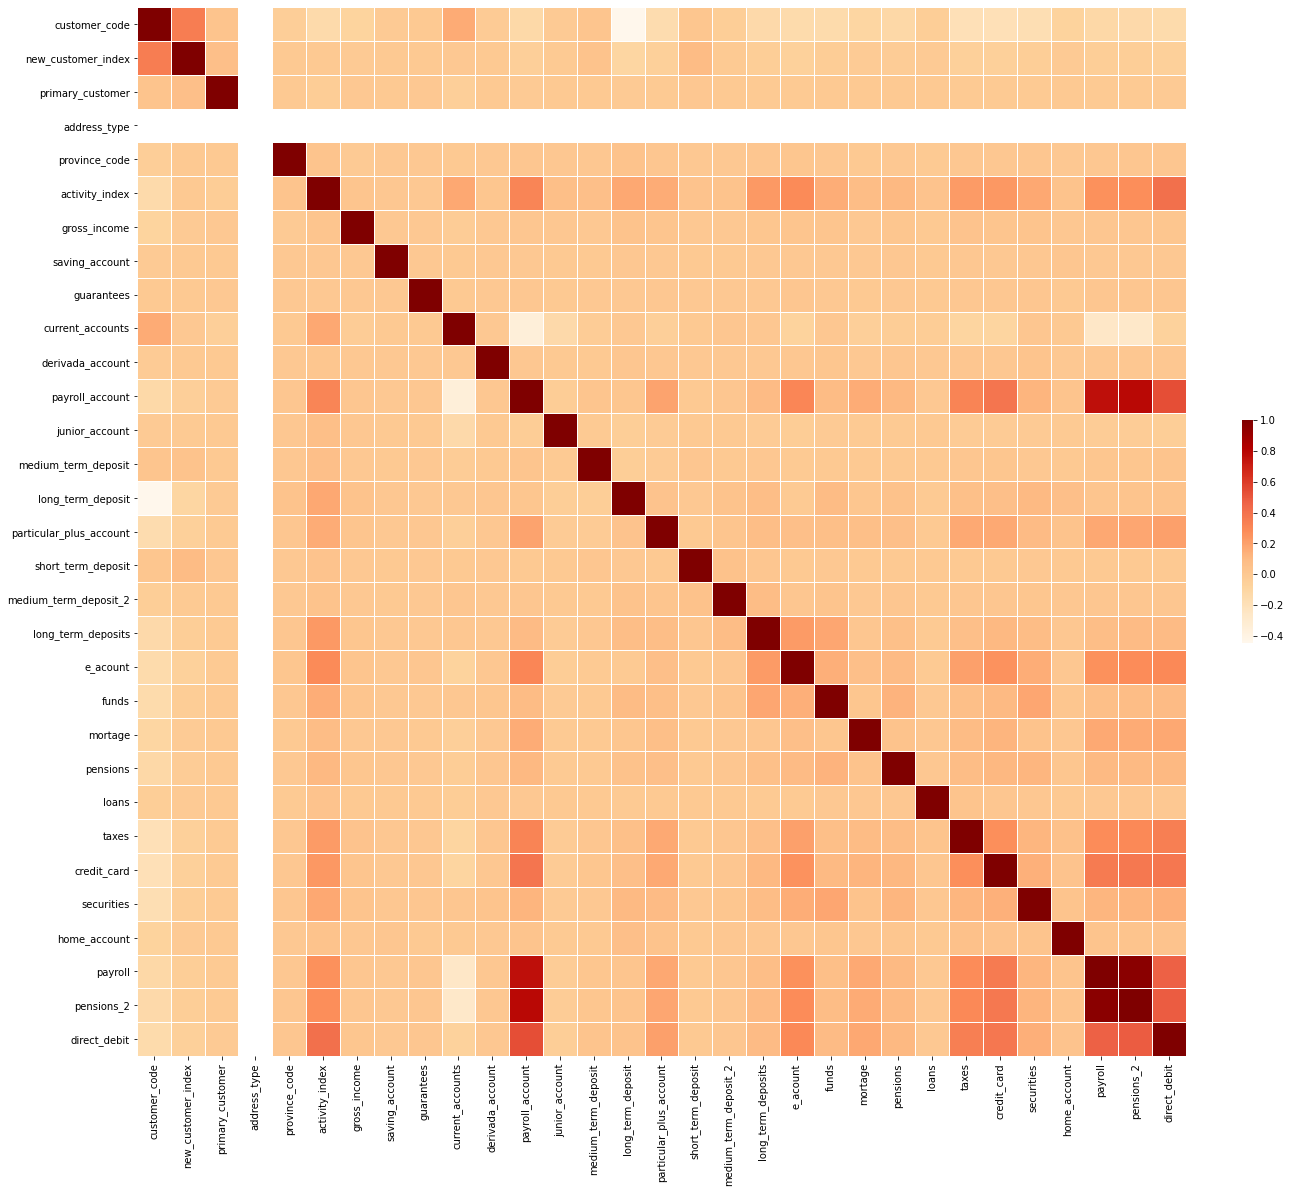

In [4]:
# calculate correlation matrix
#cols = ["customer_code", "employee_index", "sex", "age", "gross_income", "residence_index"]
corr = df.corr()# plot the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(
    corr, 
    square=True, # make cells square
    cbar_kws={'fraction' : 0.01}, # shrink colour bar
    cmap='OrRd', # use orange/red colour map
    linewidth=1 # space between cells
)
# sns.heatmap(corr, xticklabels=cols, yticklabels=cols, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

*The graph above shows that there is a strongly positive correlation between all the features in the dataset except for the address type which has no correlation.* 

### **Univariate Plot**



<AxesSubplot:xlabel='gender', ylabel='count'>

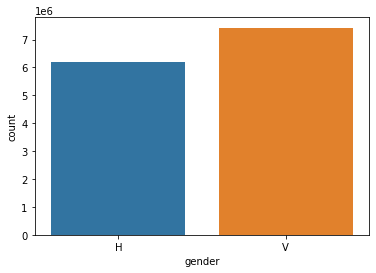

In [ ]:
sns.countplot(x = 'gender', data = df)

*From the graph above there are more females who has accounts than males.*

In [4]:
# replace NA value in age with 0
df['age'] = df['age'].replace({' NA': np.nan})
df['age'] = df['age'].replace({' ': np.nan})
df['age'] = df['age'].fillna(0)
df["age"] = pd.to_numeric(df["age"])

df['gross_income'] = df['gross_income'].replace({'nan': np.nan})
df['gross_income'] = df['gross_income'].fillna(0)
df["gross_income"] = pd.to_numeric(df["gross_income"])

<AxesSubplot:xlabel='age', ylabel='gross_income'>

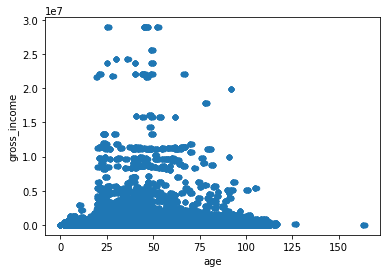

In [13]:
df.plot(kind='scatter', x='age', y='gross_income')

*From the graph above shows the correlation between age groups and gross income*

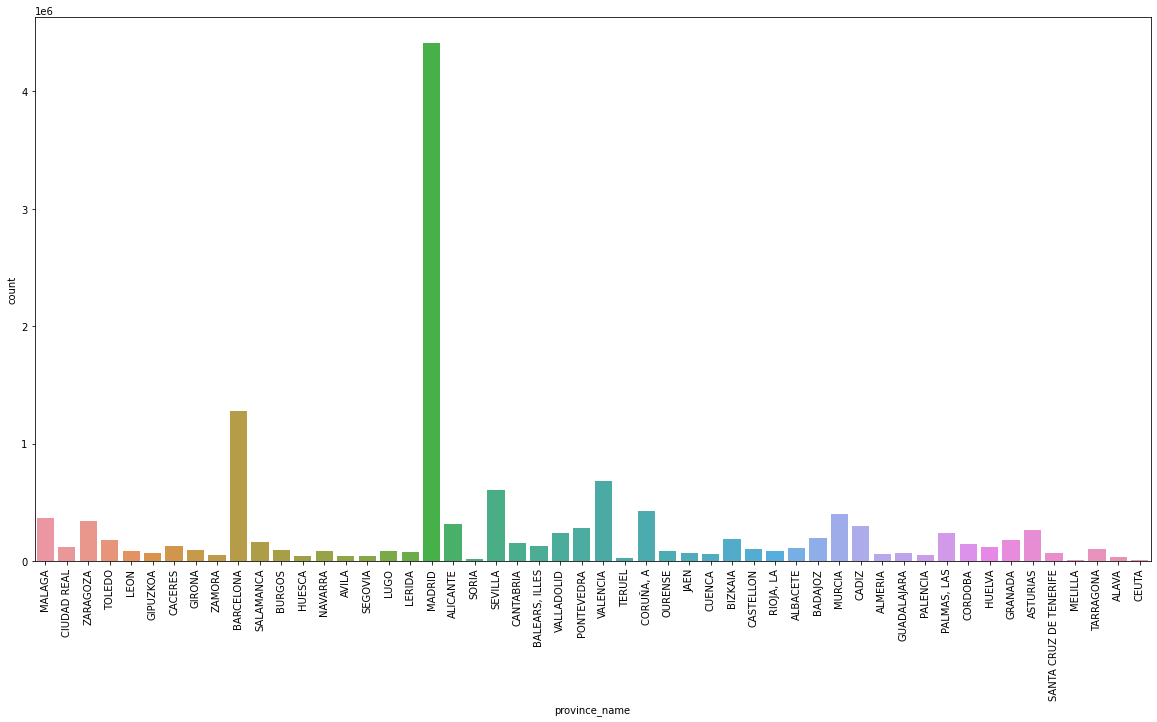

In [28]:
plt.figure(figsize=(20,10))
barplot = sns.countplot(x = 'province_name', data = df)
plt.xticks(rotation = 90)
plt.show()

*The graph above shows the number of customers in each province.*

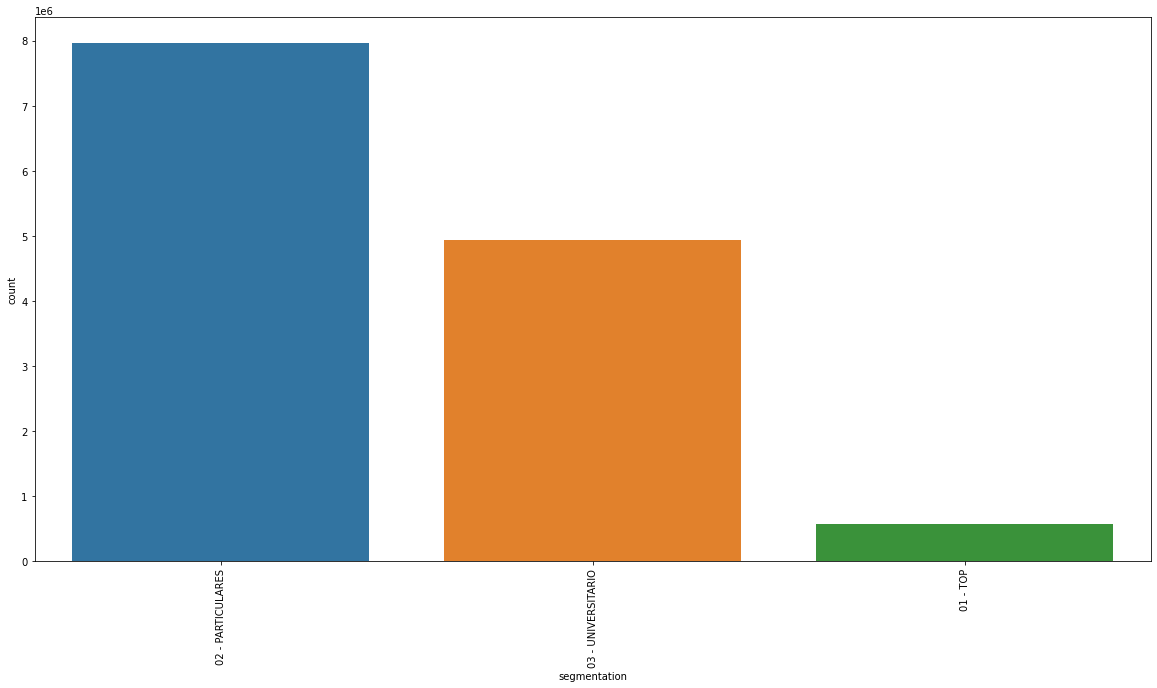

In [ ]:
plt.figure(figsize=(20,10))
barplot = sns.countplot(x = 'segmentation', data = df)
plt.xticks(rotation = 90)
plt.show()

*The graph above shows that individuals(02 - PARTICULARES) has the highest amount of customer segmentation in the dataset.*

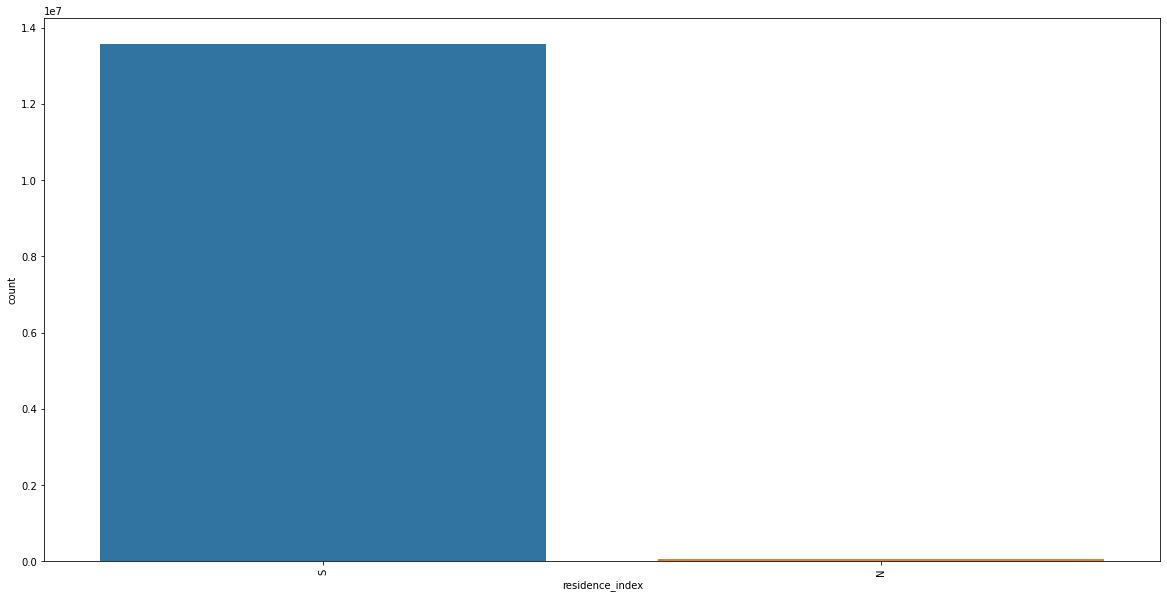

In [ ]:
plt.figure(figsize=(20,10))
barplot = sns.countplot(x = 'residence_index', data = df)
plt.xticks(rotation = 90)
plt.show()

*The gragh above shows that the majority of the customers(reseidence) live in the same country as the bank.* 



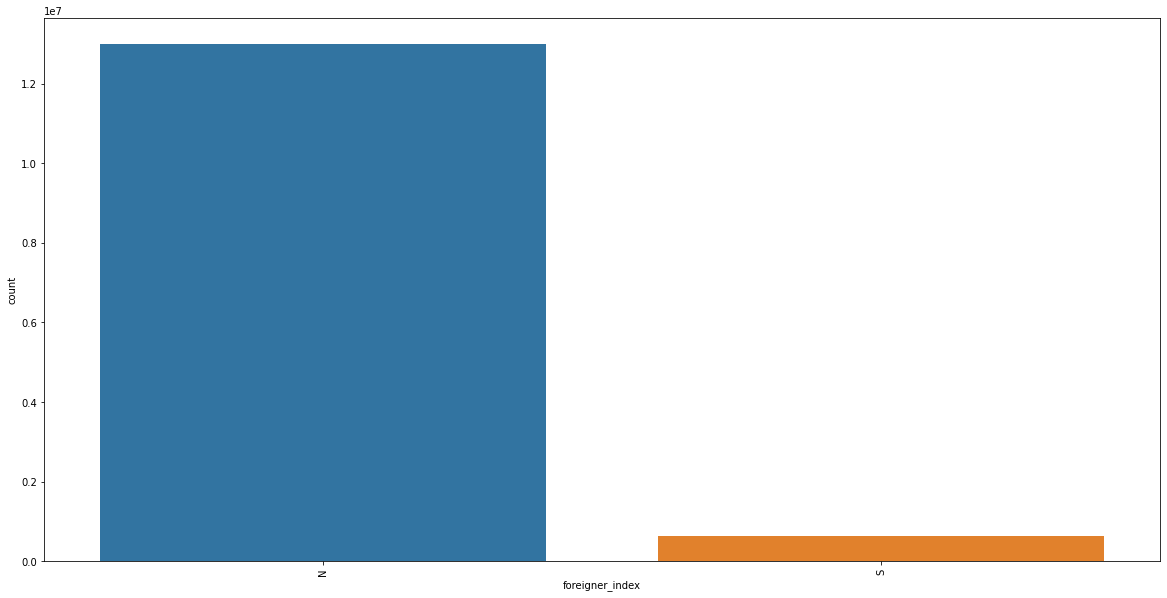

In [ ]:
plt.figure(figsize=(20,10))
barplot = sns.countplot(x = 'foreigner_index', data = df)
plt.xticks(rotation = 90)
plt.show()

*The graph above shows that majority of the foreigner have banks outside of the country.*

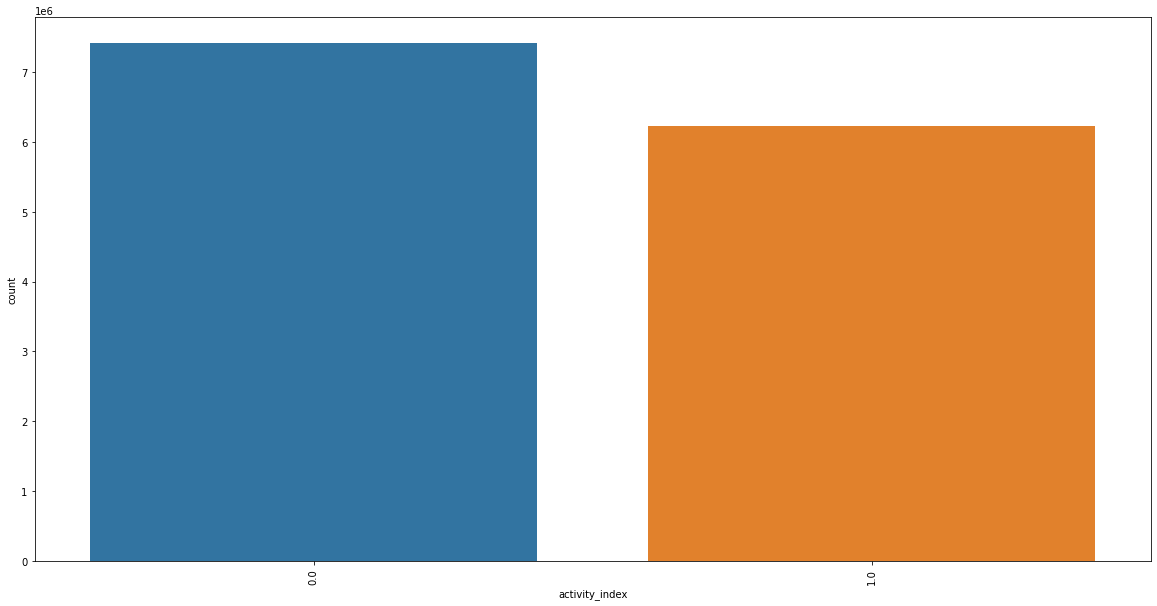

In [ ]:
plt.figure(figsize=(20,10))
barplot = sns.countplot(x = 'activity_index', data = df)
plt.xticks(rotation = 90)
plt.show()

*The graph above shows that there are more inactive customers than there are active customers.*

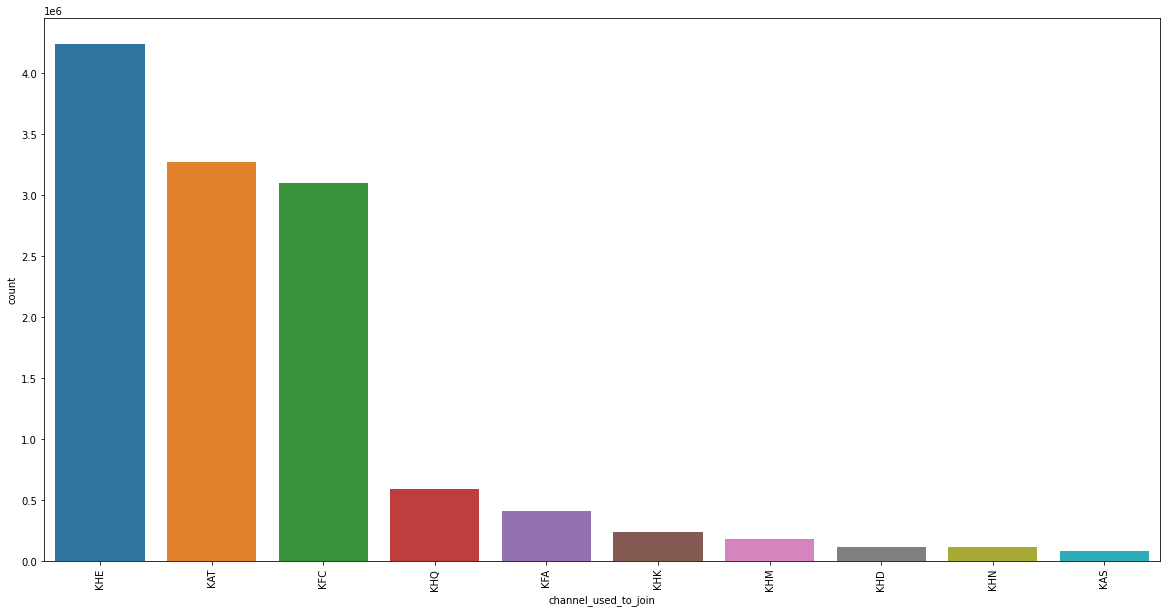

In [ ]:
plt.figure(figsize=(20,10))
barplot = sns.countplot(x = 'channel_used_to_join', data = df, order=pd.value_counts(df['channel_used_to_join']).iloc[:10].index)
plt.xticks(rotation = 90)
plt.show()

*The graph above shows the top 10 channels that the customers used to joined the bank.*

In [ ]:
# replace NA value in age with 0
df['age'] = df['age'].replace({' NA': np.nan})
df['age'] = df['age'].replace({' ': np.nan})
df['age'] = df['age'].fillna(0)
df['age'].astype(str).astype(float).astype(int)

/Users/dimitriharding/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

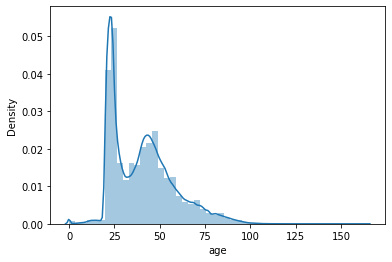

In [ ]:
sns.distplot(df['age'])

*From the graph above, it can be noted that majority of the customers are from their 20s to late 40s.*

<Figure size 1440x720 with 0 Axes>

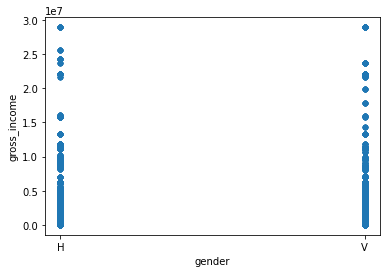

In [ ]:
df.plot.scatter(x = 'gender', y = 'gross_income')

*The graph above shows the income diversity of both male and female in the dataset*

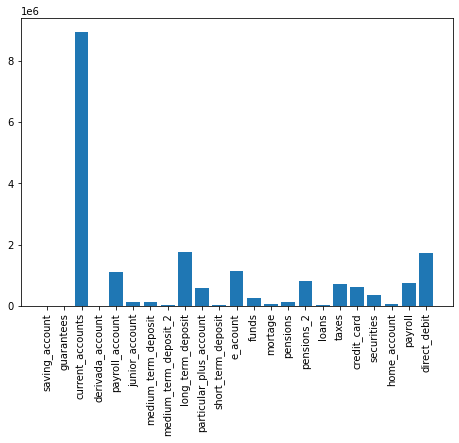

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
accounts = ['saving_account',
         'guarantees',
         'current_accounts',
         'derivada_account',
         'payroll_account',
         'junior_account',
         'medium_term_deposit',
         'medium_term_deposit_2',
         'long_term_deposit',
         'particular_plus_account',
         'short_term_deposit',
         'e_acount',
         'funds',
         'mortage',
         'pensions',
         'pensions_2',
         'loans',
         'taxes',
         'credit_card',
         'securities',
         'home_account',
         'payroll',
         'direct_debit']
active = [df['saving_account'].value_counts()[1],
            df['guarantees'].value_counts()[1],
            df['current_accounts'].value_counts()[1],
            df['derivada_account'].value_counts()[1],
            df['payroll_account'].value_counts()[1],
            df['junior_account'].value_counts()[1],
            df['medium_term_deposit'].value_counts()[1],
            df['medium_term_deposit_2'].value_counts()[1],
            df['long_term_deposit'].value_counts()[1],
            df['particular_plus_account'].value_counts()[1],
            df['short_term_deposit'].value_counts()[1],
            df['e_acount'].value_counts()[1],
            df['funds'].value_counts()[1],
            df['mortage'].value_counts()[1],
            df['pensions'].value_counts()[1],
            df['pensions_2'].value_counts()[1],
            df['loans'].value_counts()[1],
            df['taxes'].value_counts()[1],
            df['credit_card'].value_counts()[1],
            df['securities'].value_counts()[1],
            df['home_account'].value_counts()[1],
            df['payroll'].value_counts()[1],
            df['direct_debit'].value_counts()[1]]
ax.bar(accounts,active)
plt.xticks(rotation = 90)
plt.show()

*The graph above shows the amount of customers per account type.*

N0     9922900
YES    3724409
Name: multiple_accounts, dtype: int64

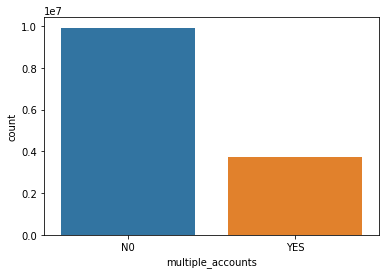

In [ ]:
# How many customers have more than one account 
df['multiple_accounts'] = ['YES' if x > 1 else 'N0' for x in np.sum(df[['saving_account', 'guarantees', 'current_accounts', 'derivada_account', 'payroll_account', 'junior_account', 'medium_term_deposit', 'medium_term_deposit_2', 'long_term_deposit', 'particular_plus_account', 'short_term_deposit', 'e_acount', 'funds', 'mortage', 'pensions', 'pensions_2', 'loans', 'taxes', 'credit_card', 'home_account', 'payroll', 'direct_debit']].values == 1, 1)]
sns.countplot(x = 'multiple_accounts', data = df)
df['multiple_accounts'].value_counts()

*The graph above shows the number of customers that has more than one account type.*

**Final Recommendation:**

Based on the exploratory data analysis ran, below are some recommendations that the analyst team at ABC analytics came up with to best help XYZ credit union use cross selling with existing customers.

* Use the mediums that the majority of customer sign up with to retarget them. Do ads that properly explain the services that XYZ credit union offers and how they will benefit an old client.

* Customer who currently only have one account – we recommend figuring out their needs based on age, income and other criteria then calling them for an appointment to suggest a personalized financial plan that is specifically suited for them. This will let XYZ credit union customers know that they are paying unique attention to their needs as clients.

* A complementary service or as we know it ‘Bundle sales’ can be provided for customers who add a new type of account. This helps the customers who are already a client to understand that things are changing and as such new customer are currently buying “x”

* With the exploratory data analysis completed XYZ credit union can also use a data-driven suggestion to cross-sell. Like, for example; if customers are always coming into the bank trying to make payments or do transaction, it can be suggested that they download the app for ease of going back and forth. Also, if a 65-year-old customer updated her pension to say she has a new grand baby; we can suggest that she opens a saving account for the new baby

Model Selection

In [5]:
df.drop_duplicates(subset=['customer_code'], inplace=True)

Base Model - Logistic Regression Model

In [6]:
# logistic regression model
import statsmodels.api as sm 
accounts = [
        'saving_account', 'guarantees', 'current_accounts', 'derivada_account',
        'payroll_account', 'junior_account', 'medium_term_deposit',
        'medium_term_deposit_2', 'long_term_deposit',
        'particular_plus_account', 'short_term_deposit', 'funds', 'pensions', 'loans', 'taxes', 'credit_card',
        'securities', 'home_account', 'direct_debit'
    ]
for acc in accounts:
    X=df[['age', 'gross_income']]
    Y=df[[acc]]
    print()
    print(acc)
    model = sm.Logit(endog=Y.astype(float), exog=X.astype(float)).fit()
    print(model.summary())


saving_account
Optimization terminated successfully.
         Current function value: 0.007279
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:         saving_account   No. Observations:               956645
Model:                          Logit   Df Residuals:                   956643
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Aug 2021   Pseudo R-squ.:                  -6.687
Time:                        13:48:24   Log-Likelihood:                -6963.7
converged:                       True   LL-Null:                       -905.85
Covariance Type:            nonrobust   LLR p-value:                     1.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
age             -0.3306      0.004    -79.847      0.000      -0.339      -0.322
gross_

/Users/dimitriharding/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:         junior_account   No. Observations:               956645
Model:                          Logit   Df Residuals:                   956643
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Aug 2021   Pseudo R-squ.:                 -0.1187
Time:                        13:48:37   Log-Likelihood:                -54590.
converged:                      False   LL-Null:                       -48799.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
age             -0.0984      0.000   -337.706      0.000      -0.099      -0.098
gross_income -5.537e-06   9.25e-08    -59.878      0.000   -5.72e-06   -5.36e-06

medium_term_deposit
Optimization terminated

Other Models:
Decision Tree Classifier
Random Forest Classifier
Logistic Regression
Boosting : Adaboost
Naive Bayes Classifier: Gaussian


saving_account
before oversampling:  
 0    669586
1        65
Name: saving_account, dtype: int64
after undersampling:  
 0    669586
1    669586
Name: saving_account, dtype: int64

 Decision Tree Classifier
Overall accuracy - train: 0.800632032330425
Confusion matrix - train:  
 [[412980 256606]
 [ 10382 659204]]
AUC - train 0.8750540413504501


Classification report - train:  
               precision    recall  f1-score   support

           0       0.98      0.62      0.76    669586
           1       0.72      0.98      0.83    669586

    accuracy                           0.80   1339172
   macro avg       0.85      0.80      0.79   1339172
weighted avg       0.85      0.80      0.79   1339172



Overall accuracy - test: 0.6174310264326084
Confusion matrix - test:  
 [[177177 109794]
 [     1     22]]
AUC - test 0.8140595330568928
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.62      0.76    286971
        

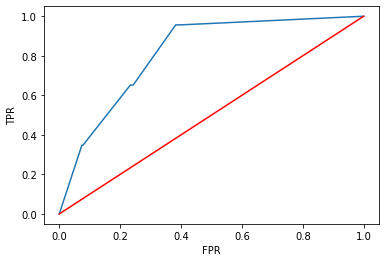


 Random Forest Classifier
Overall accuracy - train: 0.8153993661755174
Confusion matrix - train:  
 [[422374 247212]
 [     0 669586]]
AUC - train 0.9151287317070566


Classification report - train:  
               precision    recall  f1-score   support

           0       1.00      0.63      0.77    669586
           1       0.73      1.00      0.84    669586

    accuracy                           0.82   1339172
   macro avg       0.87      0.82      0.81   1339172
weighted avg       0.87      0.82      0.81   1339172



Overall accuracy - test: 0.6314696474490756
Confusion matrix - test:  
 [[181208 105763]
 [     3     20]]
AUC - test 0.83639226990517
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.63      0.77    286971
           1       0.00      0.87      0.00        23

    accuracy                           0.63    286994
   macro avg       0.50      0.75      0.39    286994
weighted avg       1.00     

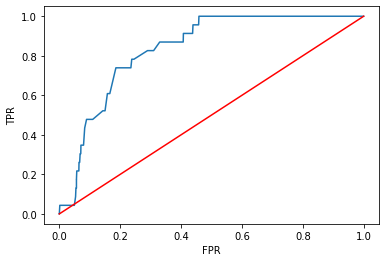


 Logistic Regression
Overall accuracy - train: 0.7108265405788055
Confusion matrix - train:  
 [[446812 222774]
 [164479 505107]]
AUC - train 0.7439951752397392


Classification report - train:  
               precision    recall  f1-score   support

           0       0.73      0.67      0.70    669586
           1       0.69      0.75      0.72    669586

    accuracy                           0.71   1339172
   macro avg       0.71      0.71      0.71   1339172
weighted avg       0.71      0.71      0.71   1339172



Overall accuracy - test: 0.6674076809968152
Confusion matrix - test:  
 [[191526  95445]
 [     7     16]]
AUC - test 0.7536448539793371
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.67      0.80    286971
           1       0.00      0.70      0.00        23

    accuracy                           0.67    286994
   macro avg       0.50      0.68      0.40    286994
weighted avg       1.00      0.

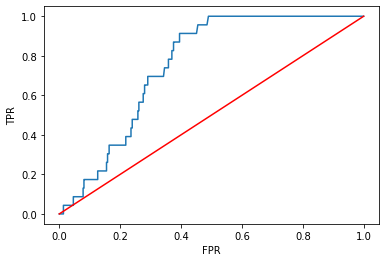


 Naive Bayes Classifier: Gaussian
Overall accuracy - train: 0.7506339738286045
Confusion matrix - train:  
 [[407830 261756]
 [ 72188 597398]]
AUC - train 0.8126570875076666


Classification report - train:  
               precision    recall  f1-score   support

           0       0.85      0.61      0.71    669586
           1       0.70      0.89      0.78    669586

    accuracy                           0.75   1339172
   macro avg       0.77      0.75      0.75   1339172
weighted avg       0.77      0.75      0.75   1339172



Overall accuracy - test: 0.6097549077681067
Confusion matrix - test:  
 [[174977 111994]
 [     4     19]]
AUC - test 0.7674714290930473
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.61      0.76    286971
           1       0.00      0.83      0.00        23

    accuracy                           0.61    286994
   macro avg       0.50      0.72      0.38    286994
weighted avg      

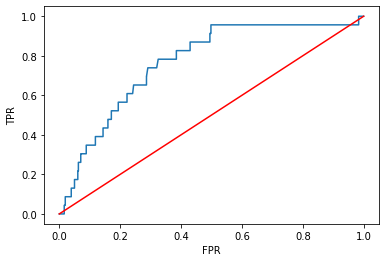


 Boosting : Adaboost
Overall accuracy - train: 0.8118165553043224
Confusion matrix - train:  
 [[438093 231493]
 [ 20517 649069]]
AUC - train 0.8956909780689299


Classification report - train:  
               precision    recall  f1-score   support

           0       0.96      0.65      0.78    669586
           1       0.74      0.97      0.84    669586

    accuracy                           0.81   1339172
   macro avg       0.85      0.81      0.81   1339172
weighted avg       0.85      0.81      0.81   1339172



Overall accuracy - test: 0.6541391109221796
Confusion matrix - test:  
 [[187717  99254]
 [     6     17]]
AUC - test 0.7754164070206762
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.65      0.79    286971
           1       0.00      0.74      0.00        23

    accuracy                           0.65    286994
   macro avg       0.50      0.70      0.40    286994
weighted avg       1.00      0.

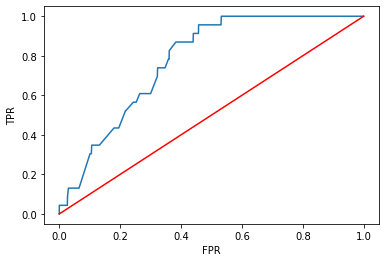


guarantees
before oversampling:  
 0    669639
1        12
Name: guarantees, dtype: int64
after undersampling:  
 0    669639
1    669639
Name: guarantees, dtype: int64

 Decision Tree Classifier
Overall accuracy - train: 0.8948806745126852
Confusion matrix - train:  
 [[528855 140784]
 [     0 669639]]
AUC - train 0.9454147375713047


Classification report - train:  
               precision    recall  f1-score   support

           0       1.00      0.79      0.88    669639
           1       0.83      1.00      0.90    669639

    accuracy                           0.89   1339278
   macro avg       0.91      0.89      0.89   1339278
weighted avg       0.91      0.89      0.89   1339278



Overall accuracy - test: 0.7903092050704893
Confusion matrix - test:  
 [[226810  60177]
 [     3      4]]
AUC - test 0.7215722563839376
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.79      0.88    286987
           1       

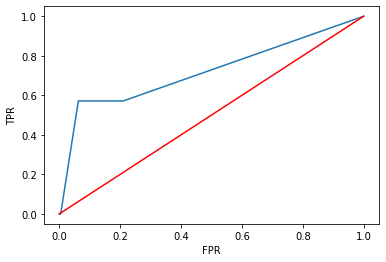


 Random Forest Classifier
Overall accuracy - train: 0.9676706404495556
Confusion matrix - train:  
 [[626341  43298]
 [     0 669639]]
AUC - train 0.9820890955541332


Classification report - train:  
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    669639
           1       0.94      1.00      0.97    669639

    accuracy                           0.97   1339278
   macro avg       0.97      0.97      0.97   1339278
weighted avg       0.97      0.97      0.97   1339278



Overall accuracy - test: 0.9358279267162379
Confusion matrix - test:  
 [[268574  18413]
 [     4      3]]
AUC - test 0.8429421143516207
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    286987
           1       0.00      0.43      0.00         7

    accuracy                           0.94    286994
   macro avg       0.50      0.68      0.48    286994
weighted avg       1.00   

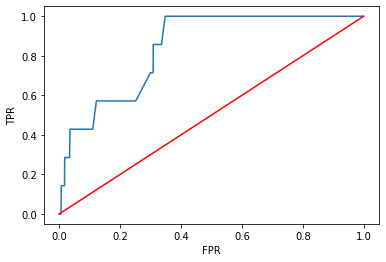


 Logistic Regression
Overall accuracy - train: 0.7068151645886813
Confusion matrix - train:  
 [[500473 169166]
 [223490 446149]]
AUC - train 0.7626811854416815


Classification report - train:  
               precision    recall  f1-score   support

           0       0.69      0.75      0.72    669639
           1       0.73      0.67      0.69    669639

    accuracy                           0.71   1339278
   macro avg       0.71      0.71      0.71   1339278
weighted avg       0.71      0.71      0.71   1339278



Overall accuracy - test: 0.7482699986759305
Confusion matrix - test:  
 [[214744  72243]
 [     2      5]]
AUC - test 0.8036715451023416
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.75      0.86    286987
           1       0.00      0.71      0.00         7

    accuracy                           0.75    286994
   macro avg       0.50      0.73      0.43    286994
weighted avg       1.00      0.

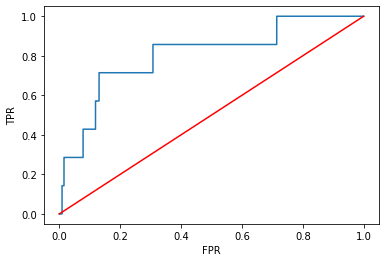


 Naive Bayes Classifier: Gaussian
Overall accuracy - train: 0.7953994615008982
Confusion matrix - train:  
 [[451439 218200]
 [ 55817 613822]]
AUC - train 0.8578878110055657


Classification report - train:  
               precision    recall  f1-score   support

           0       0.89      0.67      0.77    669639
           1       0.74      0.92      0.82    669639

    accuracy                           0.80   1339278
   macro avg       0.81      0.80      0.79   1339278
weighted avg       0.81      0.80      0.79   1339278



Overall accuracy - test: 0.6754635985421298
Confusion matrix - test:  
 [[193848  93139]
 [     1      6]]
AUC - test 0.8187324562735296
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.68      0.81    286987
           1       0.00      0.86      0.00         7

    accuracy                           0.68    286994
   macro avg       0.50      0.77      0.40    286994
weighted avg      

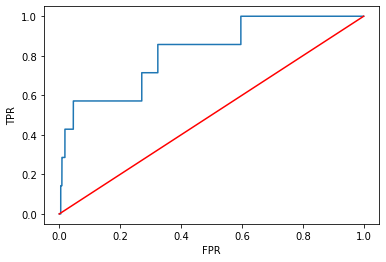


 Boosting : Adaboost
Overall accuracy - train: 0.9629860267995144
Confusion matrix - train:  
 [[620067  49572]
 [     0 669639]]
AUC - train 0.9858825540432001


Classification report - train:  
               precision    recall  f1-score   support

           0       1.00      0.93      0.96    669639
           1       0.93      1.00      0.96    669639

    accuracy                           0.96   1339278
   macro avg       0.97      0.96      0.96   1339278
weighted avg       0.97      0.96      0.96   1339278



Overall accuracy - test: 0.9260576876171628
Confusion matrix - test:  
 [[265770  21217]
 [     4      3]]
AUC - test 0.7532708051982444
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.93      0.96    286987
           1       0.00      0.43      0.00         7

    accuracy                           0.93    286994
   macro avg       0.50      0.68      0.48    286994
weighted avg       1.00      0.

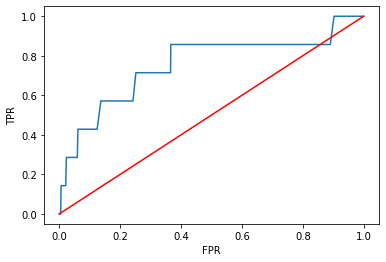


current_accounts
before oversampling:  
 1    407237
0    262414
Name: current_accounts, dtype: int64
after undersampling:  
 0    262414
1    262414
Name: current_accounts, dtype: int64

 Decision Tree Classifier
Overall accuracy - train: 0.6126426181529949
Confusion matrix - train:  
 [[200898  61516]
 [141780 120634]]
AUC - train 0.6404151197191126


Classification report - train:  
               precision    recall  f1-score   support

           0       0.59      0.77      0.66    262414
           1       0.66      0.46      0.54    262414

    accuracy                           0.61    524828
   macro avg       0.62      0.61      0.60    524828
weighted avg       0.62      0.61      0.60    524828



Overall accuracy - test: 0.5811619755116831
Confusion matrix - test:  
 [[86265 26060]
 [94144 80525]]
AUC - test 0.6419579813890002
Classification report - test:  
               precision    recall  f1-score   support

           0       0.48      0.77      0.59    112325
     

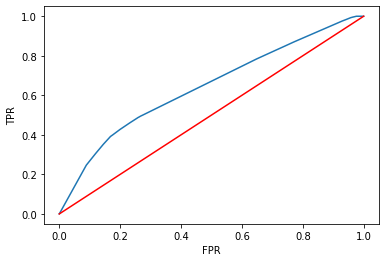


 Random Forest Classifier
Overall accuracy - train: 0.6115451157331545
Confusion matrix - train:  
 [[207014  55400]
 [148472 113942]]
AUC - train 0.6432761434079566


Classification report - train:  
               precision    recall  f1-score   support

           0       0.58      0.79      0.67    262414
           1       0.67      0.43      0.53    262414

    accuracy                           0.61    524828
   macro avg       0.63      0.61      0.60    524828
weighted avg       0.63      0.61      0.60    524828



Overall accuracy - test: 0.5747297852916786
Confusion matrix - test:  
 [[88805 23520]
 [98530 76139]]
AUC - test 0.6437614106336209
Classification report - test:  
               precision    recall  f1-score   support

           0       0.47      0.79      0.59    112325
           1       0.76      0.44      0.56    174669

    accuracy                           0.57    286994
   macro avg       0.62      0.61      0.57    286994
weighted avg       0.65      0

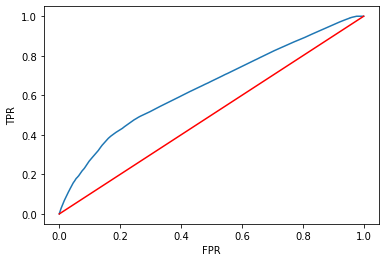


 Logistic Regression
Overall accuracy - train: 0.577745470897132
Confusion matrix - train:  
 [[145597 116817]
 [104794 157620]]
AUC - train 0.5855275357050403


Classification report - train:  
               precision    recall  f1-score   support

           0       0.58      0.55      0.57    262414
           1       0.57      0.60      0.59    262414

    accuracy                           0.58    524828
   macro avg       0.58      0.58      0.58    524828
weighted avg       0.58      0.58      0.58    524828



Overall accuracy - test: 0.5840540220353039
Confusion matrix - test:  
 [[ 62520  49805]
 [ 69569 105100]]
AUC - test 0.5879009158471684
Classification report - test:  
               precision    recall  f1-score   support

           0       0.47      0.56      0.51    112325
           1       0.68      0.60      0.64    174669

    accuracy                           0.58    286994
   macro avg       0.58      0.58      0.57    286994
weighted avg       0.60      0.5

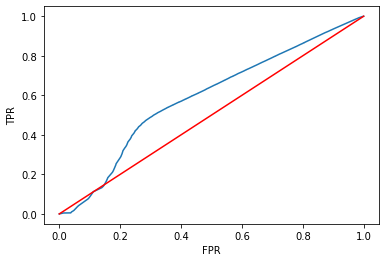


 Naive Bayes Classifier: Gaussian
Overall accuracy - train: 0.5428368913243958
Confusion matrix - train:  
 [[ 78714 183700]
 [ 56232 206182]]
AUC - train 0.5984148256943898


Classification report - train:  
               precision    recall  f1-score   support

           0       0.58      0.30      0.40    262414
           1       0.53      0.79      0.63    262414

    accuracy                           0.54    524828
   macro avg       0.56      0.54      0.51    524828
weighted avg       0.56      0.54      0.51    524828



Overall accuracy - test: 0.5969393088357248
Confusion matrix - test:  
 [[ 33918  78407]
 [ 37269 137400]]
AUC - test 0.6005649744687613
Classification report - test:  
               precision    recall  f1-score   support

           0       0.48      0.30      0.37    112325
           1       0.64      0.79      0.70    174669

    accuracy                           0.60    286994
   macro avg       0.56      0.54      0.54    286994
weighted avg      

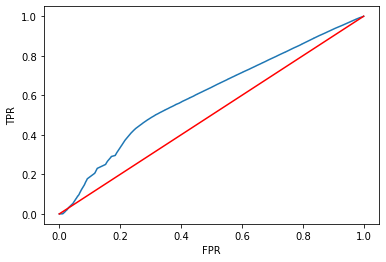


 Boosting : Adaboost
Overall accuracy - train: 0.6076352633624731
Confusion matrix - train:  
 [[195445  66969]
 [138955 123459]]
AUC - train 0.6373893283126254


Classification report - train:  
               precision    recall  f1-score   support

           0       0.58      0.74      0.65    262414
           1       0.65      0.47      0.55    262414

    accuracy                           0.61    524828
   macro avg       0.62      0.61      0.60    524828
weighted avg       0.62      0.61      0.60    524828



Overall accuracy - test: 0.5802525488337735
Confusion matrix - test:  
 [[84022 28303]
 [92162 82507]]
AUC - test 0.6393820530728244
Classification report - test:  
               precision    recall  f1-score   support

           0       0.48      0.75      0.58    112325
           1       0.74      0.47      0.58    174669

    accuracy                           0.58    286994
   macro avg       0.61      0.61      0.58    286994
weighted avg       0.64      0.58  

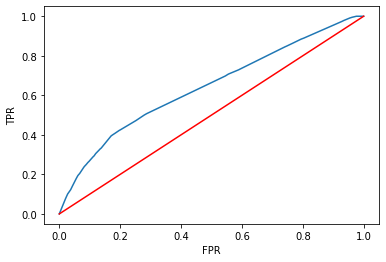


derivada_account
before oversampling:  
 0    669429
1       222
Name: derivada_account, dtype: int64
after undersampling:  
 0    669429
1    669429
Name: derivada_account, dtype: int64

 Decision Tree Classifier
Overall accuracy - train: 0.7606258468037685
Confusion matrix - train:  
 [[382368 287061]
 [ 33427 636002]]
AUC - train 0.8119038420489302


Classification report - train:  
               precision    recall  f1-score   support

           0       0.92      0.57      0.70    669429
           1       0.69      0.95      0.80    669429

    accuracy                           0.76   1338858
   macro avg       0.80      0.76      0.75   1338858
weighted avg       0.80      0.76      0.75   1338858



Overall accuracy - test: 0.5718168324076461
Confusion matrix - test:  
 [[164040 122869]
 [    17     68]]
AUC - test 0.7154513636522997
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.57      0.73    286909
 

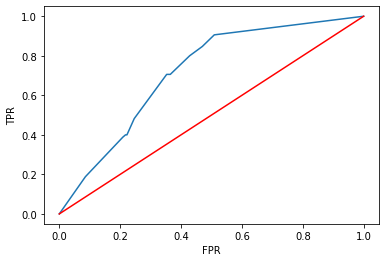


 Random Forest Classifier
Overall accuracy - train: 0.777393868505846
Confusion matrix - train:  
 [[371391 298038]
 [     0 669429]]
AUC - train 0.8456141858861532


Classification report - train:  
               precision    recall  f1-score   support

           0       1.00      0.55      0.71    669429
           1       0.69      1.00      0.82    669429

    accuracy                           0.78   1338858
   macro avg       0.85      0.78      0.77   1338858
weighted avg       0.85      0.78      0.77   1338858



Overall accuracy - test: 0.556377485243594
Confusion matrix - test:  
 [[159614 127295]
 [    22     63]]
AUC - test 0.697263797313885
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.56      0.71    286909
           1       0.00      0.74      0.00        85

    accuracy                           0.56    286994
   macro avg       0.50      0.65      0.36    286994
weighted avg       1.00      

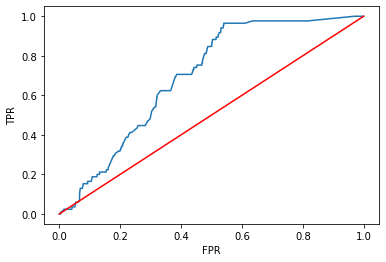


 Logistic Regression
Overall accuracy - train: 0.6853736542635589
Confusion matrix - train:  
 [[447060 222369]
 [198871 470558]]
AUC - train 0.7392751308969738


Classification report - train:  
               precision    recall  f1-score   support

           0       0.69      0.67      0.68    669429
           1       0.68      0.70      0.69    669429

    accuracy                           0.69   1338858
   macro avg       0.69      0.69      0.69   1338858
weighted avg       0.69      0.69      0.69   1338858



Overall accuracy - test: 0.667867620925873
Confusion matrix - test:  
 [[191620  95289]
 [    31     54]]
AUC - test 0.7394962698769214
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.67      0.80    286909
           1       0.00      0.64      0.00        85

    accuracy                           0.67    286994
   macro avg       0.50      0.65      0.40    286994
weighted avg       1.00      0.6

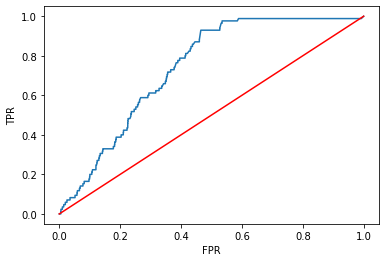


 Naive Bayes Classifier: Gaussian
Overall accuracy - train: 0.7168437578891862
Confusion matrix - train:  
 [[365574 303855]
 [ 75251 594178]]
AUC - train 0.7536624948506048


Classification report - train:  
               precision    recall  f1-score   support

           0       0.83      0.55      0.66    669429
           1       0.66      0.89      0.76    669429

    accuracy                           0.72   1338858
   macro avg       0.75      0.72      0.71   1338858
weighted avg       0.75      0.72      0.71   1338858



Overall accuracy - test: 0.5467187467333812
Confusion matrix - test:  
 [[156836 130073]
 [    16     69]]
AUC - test 0.7118239581191248
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.55      0.71    286909
           1       0.00      0.81      0.00        85

    accuracy                           0.55    286994
   macro avg       0.50      0.68      0.35    286994
weighted avg      

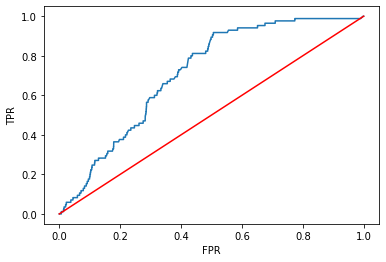


 Boosting : Adaboost
Overall accuracy - train: 0.7439616449242563
Confusion matrix - train:  
 [[368855 300574]
 [ 42225 627204]]
AUC - train 0.8133877580149467


Classification report - train:  
               precision    recall  f1-score   support

           0       0.90      0.55      0.68    669429
           1       0.68      0.94      0.79    669429

    accuracy                           0.74   1338858
   macro avg       0.79      0.74      0.73   1338858
weighted avg       0.79      0.74      0.73   1338858



Overall accuracy - test: 0.5518164142804379
Confusion matrix - test:  
 [[158303 128606]
 [    20     65]]
AUC - test 0.7012725494228237
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.55      0.71    286909
           1       0.00      0.76      0.00        85

    accuracy                           0.55    286994
   macro avg       0.50      0.66      0.36    286994
weighted avg       1.00      0.

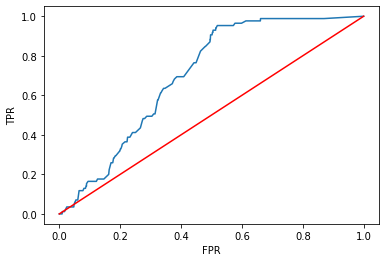


payroll_account
before oversampling:  
 0    627837
1     41814
Name: payroll_account, dtype: int64
after undersampling:  
 0    627837
1    627837
Name: payroll_account, dtype: int64

 Decision Tree Classifier
Overall accuracy - train: 0.6808287819927784
Confusion matrix - train:  
 [[334962 292875]
 [107900 519937]]
AUC - train 0.7287192656826404


Classification report - train:  
               precision    recall  f1-score   support

           0       0.76      0.53      0.63    627837
           1       0.64      0.83      0.72    627837

    accuracy                           0.68   1255674
   macro avg       0.70      0.68      0.67   1255674
weighted avg       0.70      0.68      0.67   1255674



Overall accuracy - test: 0.5520115403109472
Confusion matrix - test:  
 [[143620 125419]
 [  3151  14804]]
AUC - test 0.7265307740557759
Classification report - test:  
               precision    recall  f1-score   support

           0       0.98      0.53      0.69    269039
    

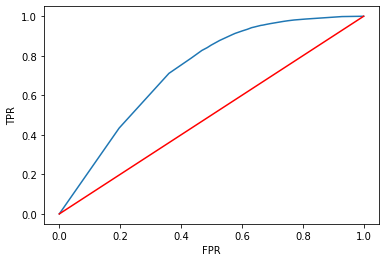


 Random Forest Classifier
Overall accuracy - train: 0.6780231174652019
Confusion matrix - train:  
 [[365900 261937]
 [142361 485476]]
AUC - train 0.7337488531018614


Classification report - train:  
               precision    recall  f1-score   support

           0       0.72      0.58      0.64    627837
           1       0.65      0.77      0.71    627837

    accuracy                           0.68   1255674
   macro avg       0.68      0.68      0.68   1255674
weighted avg       0.68      0.68      0.68   1255674



Overall accuracy - test: 0.5952180184951602
Confusion matrix - test:  
 [[156944 112095]
 [  4075  13880]]
AUC - test 0.7316109379393885
Classification report - test:  
               precision    recall  f1-score   support

           0       0.97      0.58      0.73    269039
           1       0.11      0.77      0.19     17955

    accuracy                           0.60    286994
   macro avg       0.54      0.68      0.46    286994
weighted avg       0.92   

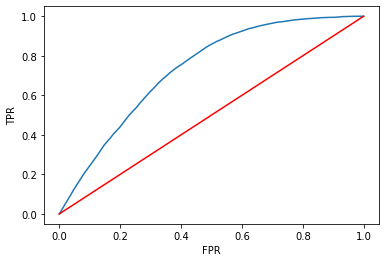


 Logistic Regression
Overall accuracy - train: 0.6070747662211688
Confusion matrix - train:  
 [[389563 238274]
 [255112 372725]]
AUC - train 0.6547783450855684


Classification report - train:  
               precision    recall  f1-score   support

           0       0.60      0.62      0.61    627837
           1       0.61      0.59      0.60    627837

    accuracy                           0.61   1255674
   macro avg       0.61      0.61      0.61   1255674
weighted avg       0.61      0.61      0.61   1255674



Overall accuracy - test: 0.6186679860903015
Confusion matrix - test:  
 [[166938 102101]
 [  7339  10616]]
AUC - test 0.6527099940247632
Classification report - test:  
               precision    recall  f1-score   support

           0       0.96      0.62      0.75    269039
           1       0.09      0.59      0.16     17955

    accuracy                           0.62    286994
   macro avg       0.53      0.61      0.46    286994
weighted avg       0.90      0.

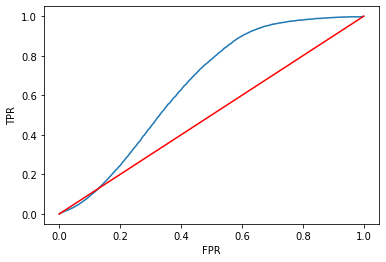


 Naive Bayes Classifier: Gaussian
Overall accuracy - train: 0.6404791371008717
Confusion matrix - train:  
 [[407841 219996]
 [231445 396392]]
AUC - train 0.70334129729664


Classification report - train:  
               precision    recall  f1-score   support

           0       0.64      0.65      0.64    627837
           1       0.64      0.63      0.64    627837

    accuracy                           0.64   1255674
   macro avg       0.64      0.64      0.64   1255674
weighted avg       0.64      0.64      0.64   1255674



Overall accuracy - test: 0.6478706871920668
Confusion matrix - test:  
 [[174687  94352]
 [  6707  11248]]
AUC - test 0.7017691048549028
Classification report - test:  
               precision    recall  f1-score   support

           0       0.96      0.65      0.78    269039
           1       0.11      0.63      0.18     17955

    accuracy                           0.65    286994
   macro avg       0.53      0.64      0.48    286994
weighted avg       0

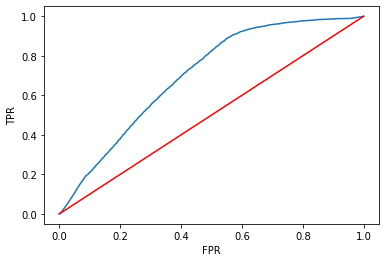


 Boosting : Adaboost
Overall accuracy - train: 0.6797480874813049
Confusion matrix - train:  
 [[354910 272927]
 [129205 498632]]
AUC - train 0.7328698528048955


Classification report - train:  
               precision    recall  f1-score   support

           0       0.73      0.57      0.64    627837
           1       0.65      0.79      0.71    627837

    accuracy                           0.68   1255674
   macro avg       0.69      0.68      0.68   1255674
weighted avg       0.69      0.68      0.68   1255674



Overall accuracy - test: 0.5804441904708809
Confusion matrix - test:  
 [[152371 116668]
 [  3742  14213]]
AUC - test 0.731538632254005
Classification report - test:  
               precision    recall  f1-score   support

           0       0.98      0.57      0.72    269039
           1       0.11      0.79      0.19     17955

    accuracy                           0.58    286994
   macro avg       0.54      0.68      0.45    286994
weighted avg       0.92      0.5

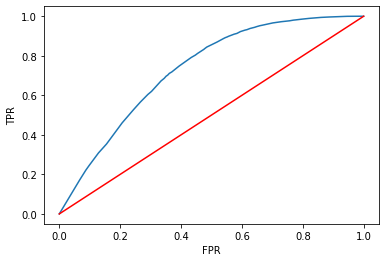


junior_account
before oversampling:  
 0    663669
1      5982
Name: junior_account, dtype: int64
after undersampling:  
 0    663669
1    663669
Name: junior_account, dtype: int64

 Decision Tree Classifier
Overall accuracy - train: 0.9780583393227648
Confusion matrix - train:  
 [[640552  23117]
 [  6007 657662]]
AUC - train 0.9981399054896621


Classification report - train:  
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    663669
           1       0.97      0.99      0.98    663669

    accuracy                           0.98   1327338
   macro avg       0.98      0.98      0.98   1327338
weighted avg       0.98      0.98      0.98   1327338



Overall accuracy - test: 0.9652710509627379
Confusion matrix - test:  
 [[274495   9941]
 [    26   2532]]
AUC - test 0.9965207982028405
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    284436
       

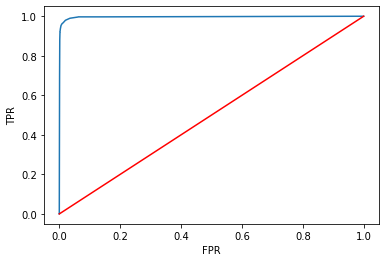


 Random Forest Classifier
Overall accuracy - train: 0.9788795318148052
Confusion matrix - train:  
 [[647540  16129]
 [ 11905 651764]]
AUC - train 0.9980595229963644


Classification report - train:  
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    663669
           1       0.98      0.98      0.98    663669

    accuracy                           0.98   1327338
   macro avg       0.98      0.98      0.98   1327338
weighted avg       0.98      0.98      0.98   1327338



Overall accuracy - test: 0.9756824184477725
Confusion matrix - test:  
 [[277502   6934]
 [    45   2513]]
AUC - test 0.9978527737829307
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    284436
           1       0.27      0.98      0.42      2558

    accuracy                           0.98    286994
   macro avg       0.63      0.98      0.70    286994
weighted avg       0.99   

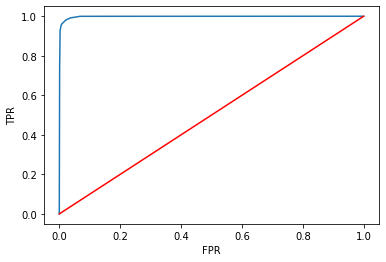


 Logistic Regression
Overall accuracy - train: 0.9766894340401616
Confusion matrix - train:  
 [[647861  15808]
 [ 15133 648536]]
AUC - train 0.9902389973576892


Classification report - train:  
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    663669
           1       0.98      0.98      0.98    663669

    accuracy                           0.98   1327338
   macro avg       0.98      0.98      0.98   1327338
weighted avg       0.98      0.98      0.98   1327338



Overall accuracy - test: 0.9761214520164184
Confusion matrix - test:  
 [[277626   6810]
 [    43   2515]]
AUC - test 0.9902698203820186
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    284436
           1       0.27      0.98      0.42      2558

    accuracy                           0.98    286994
   macro avg       0.63      0.98      0.71    286994
weighted avg       0.99      0.

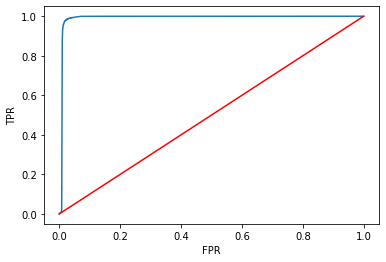


 Naive Bayes Classifier: Gaussian
Overall accuracy - train: 0.9108426037678421
Confusion matrix - train:  
 [[561052 102617]
 [ 15725 647944]]
AUC - train 0.9896909249527603


Classification report - train:  
               precision    recall  f1-score   support

           0       0.97      0.85      0.90    663669
           1       0.86      0.98      0.92    663669

    accuracy                           0.91   1327338
   macro avg       0.92      0.91      0.91   1327338
weighted avg       0.92      0.91      0.91   1327338



Overall accuracy - test: 0.8458504358976145
Confusion matrix - test:  
 [[240247  44189]
 [    51   2507]]
AUC - test 0.9916733921827398
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.84      0.92    284436
           1       0.05      0.98      0.10      2558

    accuracy                           0.85    286994
   macro avg       0.53      0.91      0.51    286994
weighted avg      

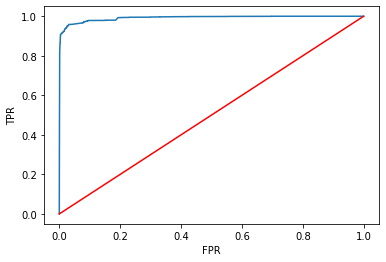


 Boosting : Adaboost
Overall accuracy - train: 0.9777712986443543
Confusion matrix - train:  
 [[650316  13353]
 [ 16152 647517]]
AUC - train 0.9981134260316464


Classification report - train:  
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    663669
           1       0.98      0.98      0.98    663669

    accuracy                           0.98   1327338
   macro avg       0.98      0.98      0.98   1327338
weighted avg       0.98      0.98      0.98   1327338



Overall accuracy - test: 0.9797696119082628
Confusion matrix - test:  
 [[278681   5755]
 [    51   2507]]
AUC - test 0.9981652393849959
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    284436
           1       0.30      0.98      0.46      2558

    accuracy                           0.98    286994
   macro avg       0.65      0.98      0.73    286994
weighted avg       0.99      0.

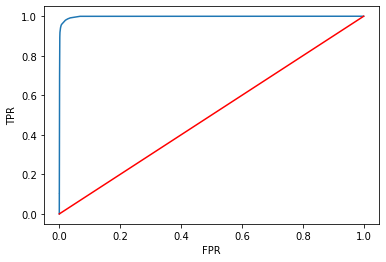


medium_term_deposit
before oversampling:  
 0    661795
1      7856
Name: medium_term_deposit, dtype: int64
after undersampling:  
 0    661795
1    661795
Name: medium_term_deposit, dtype: int64

 Decision Tree Classifier
Overall accuracy - train: 0.6652226142536586
Confusion matrix - train:  
 [[274869 386926]
 [ 56182 605613]]
AUC - train 0.7082345498146095


Classification report - train:  
               precision    recall  f1-score   support

           0       0.83      0.42      0.55    661795
           1       0.61      0.92      0.73    661795

    accuracy                           0.67   1323590
   macro avg       0.72      0.67      0.64   1323590
weighted avg       0.72      0.67      0.64   1323590



Overall accuracy - test: 0.42115514610061533
Confusion matrix - test:  
 [[117911 165817]
 [   308   2958]]
AUC - test 0.7072927736582467
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.42      0.59  

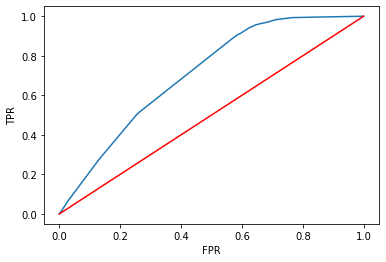


 Random Forest Classifier
Overall accuracy - train: 0.6658784064551712
Confusion matrix - train:  
 [[258331 403464]
 [ 38776 623019]]
AUC - train 0.7158268418867157


Classification report - train:  
               precision    recall  f1-score   support

           0       0.87      0.39      0.54    661795
           1       0.61      0.94      0.74    661795

    accuracy                           0.67   1323590
   macro avg       0.74      0.67      0.64   1323590
weighted avg       0.74      0.67      0.64   1323590



Overall accuracy - test: 0.3969177055966327
Confusion matrix - test:  
 [[110872 172856]
 [   225   3041]]
AUC - test 0.7115909096579531
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.39      0.56    283728
           1       0.02      0.93      0.03      3266

    accuracy                           0.40    286994
   macro avg       0.51      0.66      0.30    286994
weighted avg       0.99   

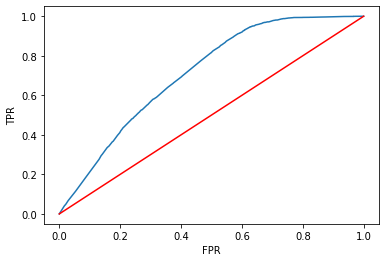


 Logistic Regression
Overall accuracy - train: 0.5762940185404846
Confusion matrix - train:  
 [[400853 260942]
 [299871 361924]]
AUC - train 0.6427923711152206


Classification report - train:  
               precision    recall  f1-score   support

           0       0.57      0.61      0.59    661795
           1       0.58      0.55      0.56    661795

    accuracy                           0.58   1323590
   macro avg       0.58      0.58      0.58   1323590
weighted avg       0.58      0.58      0.58   1323590



Overall accuracy - test: 0.6052704934597936
Confusion matrix - test:  
 [[171880 111848]
 [  1437   1829]]
AUC - test 0.6455760592310121
Classification report - test:  
               precision    recall  f1-score   support

           0       0.99      0.61      0.75    283728
           1       0.02      0.56      0.03      3266

    accuracy                           0.61    286994
   macro avg       0.50      0.58      0.39    286994
weighted avg       0.98      0.

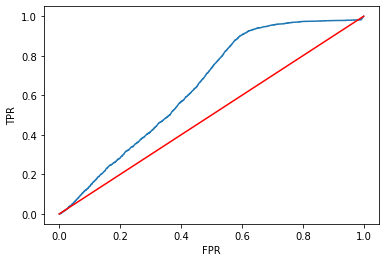


 Naive Bayes Classifier: Gaussian
Overall accuracy - train: 0.6382860251286274
Confusion matrix - train:  
 [[313964 347831]
 [130930 530865]]
AUC - train 0.6463406919641692


Classification report - train:  
               precision    recall  f1-score   support

           0       0.71      0.47      0.57    661795
           1       0.60      0.80      0.69    661795

    accuracy                           0.64   1323590
   macro avg       0.65      0.64      0.63   1323590
weighted avg       0.65      0.64      0.63   1323590



Overall accuracy - test: 0.47905879565426457
Confusion matrix - test:  
 [[134892 148836]
 [   671   2595]]
AUC - test 0.648777753416337
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.48      0.64    283728
           1       0.02      0.79      0.03      3266

    accuracy                           0.48    286994
   macro avg       0.51      0.63      0.34    286994
weighted avg      

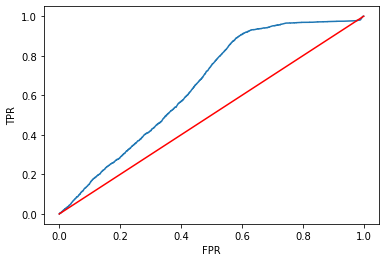


 Boosting : Adaboost
Overall accuracy - train: 0.6653850512620978
Confusion matrix - train:  
 [[259786 402009]
 [ 40884 620911]]
AUC - train 0.7118147693777641


Classification report - train:  
               precision    recall  f1-score   support

           0       0.86      0.39      0.54    661795
           1       0.61      0.94      0.74    661795

    accuracy                           0.67   1323590
   macro avg       0.74      0.67      0.64   1323590
weighted avg       0.74      0.67      0.64   1323590



Overall accuracy - test: 0.39917907691449994
Confusion matrix - test:  
 [[111531 172197]
 [   235   3031]]
AUC - test 0.7099152721076384
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.39      0.56    283728
           1       0.02      0.93      0.03      3266

    accuracy                           0.40    286994
   macro avg       0.51      0.66      0.30    286994
weighted avg       0.99      0

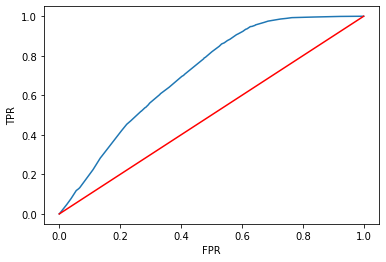


medium_term_deposit_2
before oversampling:  
 0    668535
1      1116
Name: medium_term_deposit_2, dtype: int64
after undersampling:  
 0    668535
1    668535
Name: medium_term_deposit_2, dtype: int64

 Decision Tree Classifier
Overall accuracy - train: 0.7242560224969523
Confusion matrix - train:  
 [[349046 319489]
 [ 49200 619335]]
AUC - train 0.7586507588224985


Classification report - train:  
               precision    recall  f1-score   support

           0       0.88      0.52      0.65    668535
           1       0.66      0.93      0.77    668535

    accuracy                           0.72   1337070
   macro avg       0.77      0.72      0.71   1337070
weighted avg       0.77      0.72      0.71   1337070



Overall accuracy - test: 0.5226799166533098
Confusion matrix - test:  
 [[149552 136938]
 [    50    454]]
AUC - test 0.7388095141136259
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.52      0

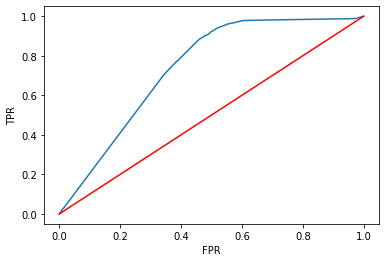


 Random Forest Classifier
Overall accuracy - train: 0.7284375537555999
Confusion matrix - train:  
 [[351072 317463]
 [ 45635 622900]]
AUC - train 0.7753687307956577


Classification report - train:  
               precision    recall  f1-score   support

           0       0.88      0.53      0.66    668535
           1       0.66      0.93      0.77    668535

    accuracy                           0.73   1337070
   macro avg       0.77      0.73      0.72   1337070
weighted avg       0.77      0.73      0.72   1337070



Overall accuracy - test: 0.5267740789006042
Confusion matrix - test:  
 [[150731 135759]
 [    54    450]]
AUC - test 0.7488231188434511
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.53      0.69    286490
           1       0.00      0.89      0.01       504

    accuracy                           0.53    286994
   macro avg       0.50      0.71      0.35    286994
weighted avg       1.00   

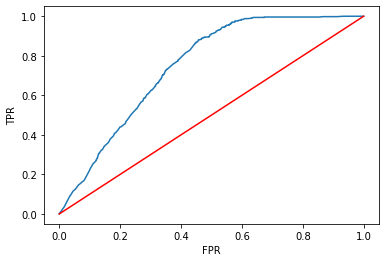


 Logistic Regression
Overall accuracy - train: 0.6649322772928867
Confusion matrix - train:  
 [[448216 220319]
 [227690 440845]]
AUC - train 0.7361706793802069


Classification report - train:  
               precision    recall  f1-score   support

           0       0.66      0.67      0.67    668535
           1       0.67      0.66      0.66    668535

    accuracy                           0.66   1337070
   macro avg       0.66      0.66      0.66   1337070
weighted avg       0.66      0.66      0.66   1337070



Overall accuracy - test: 0.6703450246346614
Confusion matrix - test:  
 [[192062  94428]
 [   181    323]]
AUC - test 0.7323276194022118
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.67      0.80    286490
           1       0.00      0.64      0.01       504

    accuracy                           0.67    286994
   macro avg       0.50      0.66      0.40    286994
weighted avg       1.00      0.

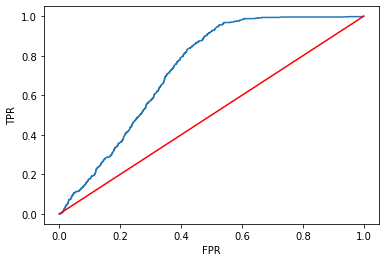


 Naive Bayes Classifier: Gaussian
Overall accuracy - train: 0.7011158727665717
Confusion matrix - train:  
 [[342787 325748]
 [ 73881 594654]]
AUC - train 0.7289699608343947


Classification report - train:  
               precision    recall  f1-score   support

           0       0.82      0.51      0.63    668535
           1       0.65      0.89      0.75    668535

    accuracy                           0.70   1337070
   macro avg       0.73      0.70      0.69   1337070
weighted avg       0.73      0.70      0.69   1337070



Overall accuracy - test: 0.514791249991289
Confusion matrix - test:  
 [[147287 139203]
 [    49    455]]
AUC - test 0.7321169621699308
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.51      0.68    286490
           1       0.00      0.90      0.01       504

    accuracy                           0.51    286994
   macro avg       0.50      0.71      0.34    286994
weighted avg       

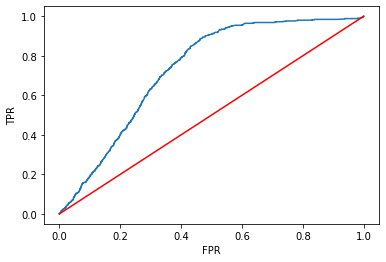


 Boosting : Adaboost
Overall accuracy - train: 0.7162100712752512
Confusion matrix - train:  
 [[349626 318909]
 [ 60538 607997]]
AUC - train 0.7719543888682984


Classification report - train:  
               precision    recall  f1-score   support

           0       0.85      0.52      0.65    668535
           1       0.66      0.91      0.76    668535

    accuracy                           0.72   1337070
   macro avg       0.75      0.72      0.71   1337070
weighted avg       0.75      0.72      0.71   1337070



Overall accuracy - test: 0.5253524463926075
Confusion matrix - test:  
 [[150325 136165]
 [    56    448]]
AUC - test 0.7513502057192499
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.52      0.69    286490
           1       0.00      0.89      0.01       504

    accuracy                           0.53    286994
   macro avg       0.50      0.71      0.35    286994
weighted avg       1.00      0.

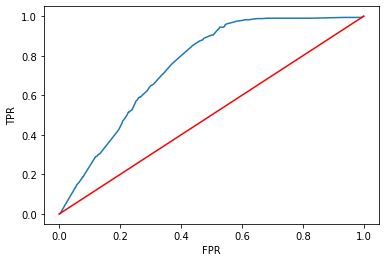


long_term_deposit
before oversampling:  
 0    595159
1     74492
Name: long_term_deposit, dtype: int64
after undersampling:  
 0    595159
1    595159
Name: long_term_deposit, dtype: int64

 Decision Tree Classifier
Overall accuracy - train: 0.7451521358158072
Confusion matrix - train:  
 [[338966 256193]
 [ 47157 548002]]
AUC - train 0.7949987173401017


Classification report - train:  
               precision    recall  f1-score   support

           0       0.88      0.57      0.69    595159
           1       0.68      0.92      0.78    595159

    accuracy                           0.75   1190318
   macro avg       0.78      0.75      0.74   1190318
weighted avg       0.78      0.75      0.74   1190318



Overall accuracy - test: 0.6090649978745201
Confusion matrix - test:  
 [[145446 109527]
 [  2669  29352]]
AUC - test 0.7943003681880851
Classification report - test:  
               precision    recall  f1-score   support

           0       0.98      0.57      0.72    25497

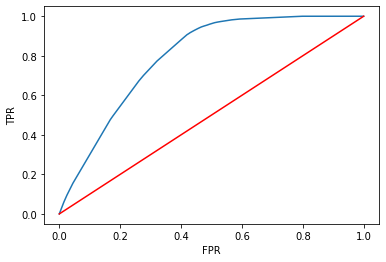


 Random Forest Classifier
Overall accuracy - train: 0.7445901011326385
Confusion matrix - train:  
 [[332727 262432]
 [ 41587 553572]]
AUC - train 0.7954953154422657


Classification report - train:  
               precision    recall  f1-score   support

           0       0.89      0.56      0.69    595159
           1       0.68      0.93      0.78    595159

    accuracy                           0.74   1190318
   macro avg       0.78      0.74      0.74   1190318
weighted avg       0.78      0.74      0.74   1190318



Overall accuracy - test: 0.6008035011184902
Confusion matrix - test:  
 [[142786 112187]
 [  2380  29641]]
AUC - test 0.7944449011518611
Classification report - test:  
               precision    recall  f1-score   support

           0       0.98      0.56      0.71    254973
           1       0.21      0.93      0.34     32021

    accuracy                           0.60    286994
   macro avg       0.60      0.74      0.53    286994
weighted avg       0.90   

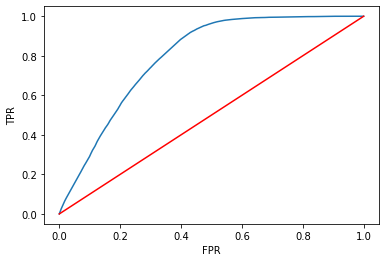


 Logistic Regression
Overall accuracy - train: 0.6998037499222897
Confusion matrix - train:  
 [[422475 172684]
 [184645 410514]]
AUC - train 0.7841185026899405


Classification report - train:  
               precision    recall  f1-score   support

           0       0.70      0.71      0.70    595159
           1       0.70      0.69      0.70    595159

    accuracy                           0.70   1190318
   macro avg       0.70      0.70      0.70   1190318
weighted avg       0.70      0.70      0.70   1190318



Overall accuracy - test: 0.7066767946368216
Confusion matrix - test:  
 [[180854  74119]
 [ 10063  21958]]
AUC - test 0.7828847692888221
Classification report - test:  
               precision    recall  f1-score   support

           0       0.95      0.71      0.81    254973
           1       0.23      0.69      0.34     32021

    accuracy                           0.71    286994
   macro avg       0.59      0.70      0.58    286994
weighted avg       0.87      0.

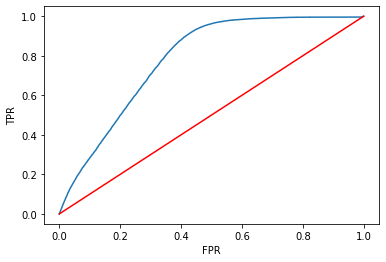


 Naive Bayes Classifier: Gaussian
Overall accuracy - train: 0.6730587960528195
Confusion matrix - train:  
 [[445961 149198]
 [239966 355193]]
AUC - train 0.7808705331085166


Classification report - train:  
               precision    recall  f1-score   support

           0       0.65      0.75      0.70    595159
           1       0.70      0.60      0.65    595159

    accuracy                           0.67   1190318
   macro avg       0.68      0.67      0.67   1190318
weighted avg       0.68      0.67      0.67   1190318



Overall accuracy - test: 0.7319525843745862
Confusion matrix - test:  
 [[191019  63954]
 [ 12974  19047]]
AUC - test 0.7796004033237869
Classification report - test:  
               precision    recall  f1-score   support

           0       0.94      0.75      0.83    254973
           1       0.23      0.59      0.33     32021

    accuracy                           0.73    286994
   macro avg       0.58      0.67      0.58    286994
weighted avg      

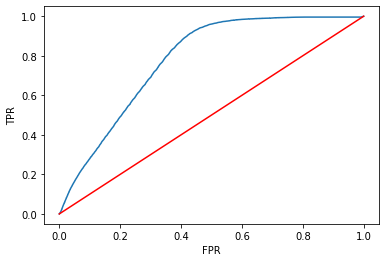


 Boosting : Adaboost
Overall accuracy - train: 0.7433853810494339
Confusion matrix - train:  
 [[337077 258082]
 [ 47371 547788]]
AUC - train 0.7951728326956042


Classification report - train:  
               precision    recall  f1-score   support

           0       0.88      0.57      0.69    595159
           1       0.68      0.92      0.78    595159

    accuracy                           0.74   1190318
   macro avg       0.78      0.74      0.74   1190318
weighted avg       0.78      0.74      0.74   1190318



Overall accuracy - test: 0.605974340926988
Confusion matrix - test:  
 [[144550 110423]
 [  2660  29361]]
AUC - test 0.7946184000997285
Classification report - test:  
               precision    recall  f1-score   support

           0       0.98      0.57      0.72    254973
           1       0.21      0.92      0.34     32021

    accuracy                           0.61    286994
   macro avg       0.60      0.74      0.53    286994
weighted avg       0.90      0.6

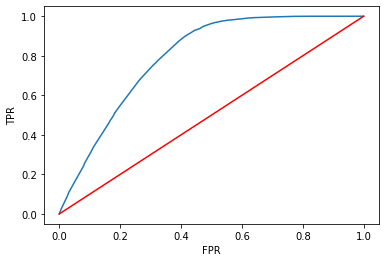


particular_plus_account
before oversampling:  
 0    644281
1     25370
Name: particular_plus_account, dtype: int64
after undersampling:  
 0    644281
1    644281
Name: particular_plus_account, dtype: int64

 Decision Tree Classifier
Overall accuracy - train: 0.7127767231999702
Confusion matrix - train:  
 [[316319 327962]
 [ 42143 602138]]
AUC - train 0.7658394307669314


Classification report - train:  
               precision    recall  f1-score   support

           0       0.88      0.49      0.63    644281
           1       0.65      0.93      0.76    644281

    accuracy                           0.71   1288562
   macro avg       0.76      0.71      0.70   1288562
weighted avg       0.76      0.71      0.70   1288562



Overall accuracy - test: 0.508756280619107
Confusion matrix - test:  
 [[135906 140248]
 [   736  10104]]
AUC - test 0.7663840641874593
Classification report - test:  
               precision    recall  f1-score   support

           0       0.99      0.49  

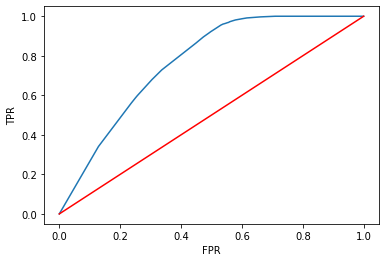


 Random Forest Classifier
Overall accuracy - train: 0.7131158609364547
Confusion matrix - train:  
 [[308088 336193]
 [ 33475 610806]]
AUC - train 0.7686839487342532


Classification report - train:  
               precision    recall  f1-score   support

           0       0.90      0.48      0.63    644281
           1       0.64      0.95      0.77    644281

    accuracy                           0.71   1288562
   macro avg       0.77      0.71      0.70   1288562
weighted avg       0.77      0.71      0.70   1288562



Overall accuracy - test: 0.4970870471159676
Confusion matrix - test:  
 [[132406 143748]
 [   585  10255]]
AUC - test 0.7686120248175874
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.48      0.65    276154
           1       0.07      0.95      0.12     10840

    accuracy                           0.50    286994
   macro avg       0.53      0.71      0.39    286994
weighted avg       0.96   

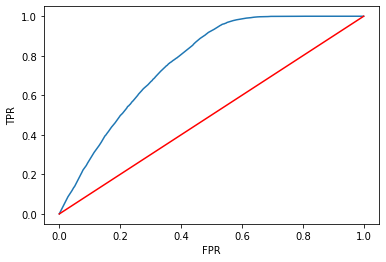


 Logistic Regression
Overall accuracy - train: 0.6479470914088729
Confusion matrix - train:  
 [[423645 220636]
 [233006 411275]]
AUC - train 0.7178267659509512


Classification report - train:  
               precision    recall  f1-score   support

           0       0.65      0.66      0.65    644281
           1       0.65      0.64      0.64    644281

    accuracy                           0.65   1288562
   macro avg       0.65      0.65      0.65   1288562
weighted avg       0.65      0.65      0.65   1288562



Overall accuracy - test: 0.6566966556792128
Confusion matrix - test:  
 [[181558  94596]
 [  3930   6910]]
AUC - test 0.7160587997961029
Classification report - test:  
               precision    recall  f1-score   support

           0       0.98      0.66      0.79    276154
           1       0.07      0.64      0.12     10840

    accuracy                           0.66    286994
   macro avg       0.52      0.65      0.45    286994
weighted avg       0.94      0.

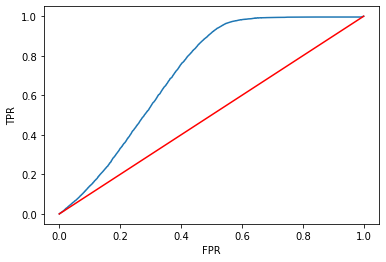


 Naive Bayes Classifier: Gaussian
Overall accuracy - train: 0.6568725447436755
Confusion matrix - train:  
 [[417836 226445]
 [215696 428585]]
AUC - train 0.7287238778357233


Classification report - train:  
               precision    recall  f1-score   support

           0       0.66      0.65      0.65    644281
           1       0.65      0.67      0.66    644281

    accuracy                           0.66   1288562
   macro avg       0.66      0.66      0.66   1288562
weighted avg       0.66      0.66      0.66   1288562



Overall accuracy - test: 0.6496372746468567
Confusion matrix - test:  
 [[179218  96936]
 [  3616   7224]]
AUC - test 0.729270227670175
Classification report - test:  
               precision    recall  f1-score   support

           0       0.98      0.65      0.78    276154
           1       0.07      0.67      0.13     10840

    accuracy                           0.65    286994
   macro avg       0.52      0.66      0.45    286994
weighted avg       

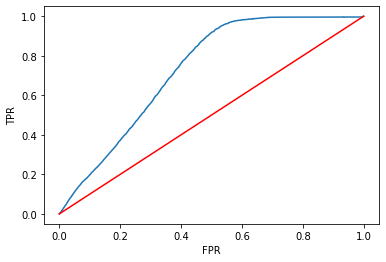


 Boosting : Adaboost
Overall accuracy - train: 0.7116103066829536
Confusion matrix - train:  
 [[327632 316649]
 [ 54959 589322]]
AUC - train 0.7673907853029712


Classification report - train:  
               precision    recall  f1-score   support

           0       0.86      0.51      0.64    644281
           1       0.65      0.91      0.76    644281

    accuracy                           0.71   1288562
   macro avg       0.75      0.71      0.70   1288562
weighted avg       0.75      0.71      0.70   1288562



Overall accuracy - test: 0.5253419932124016
Confusion matrix - test:  
 [[140828 135326]
 [   898   9942]]
AUC - test 0.7693769629636301
Classification report - test:  
               precision    recall  f1-score   support

           0       0.99      0.51      0.67    276154
           1       0.07      0.92      0.13     10840

    accuracy                           0.53    286994
   macro avg       0.53      0.71      0.40    286994
weighted avg       0.96      0.

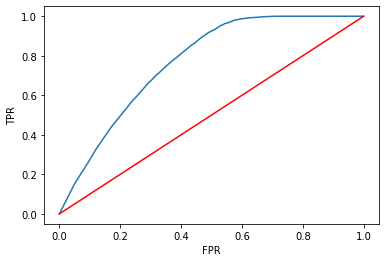


short_term_deposit
before oversampling:  
 0    667122
1      2529
Name: short_term_deposit, dtype: int64
after undersampling:  
 0    667122
1    667122
Name: short_term_deposit, dtype: int64

 Decision Tree Classifier
Overall accuracy - train: 0.6741420609723558
Confusion matrix - train:  
 [[316368 350754]
 [ 84020 583102]]
AUC - train 0.704945620294675


Classification report - train:  
               precision    recall  f1-score   support

           0       0.79      0.47      0.59    667122
           1       0.62      0.87      0.73    667122

    accuracy                           0.67   1334244
   macro avg       0.71      0.67      0.66   1334244
weighted avg       0.71      0.67      0.66   1334244



Overall accuracy - test: 0.47626431214589854
Confusion matrix - test:  
 [[135713 150166]
 [   143    972]]
AUC - test 0.7065104420216544
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.47      0.64    28

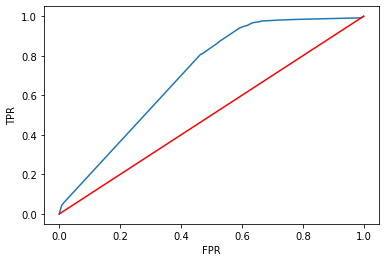


 Random Forest Classifier
Overall accuracy - train: 0.6792595657166155
Confusion matrix - train:  
 [[293251 373871]
 [ 54075 613047]]
AUC - train 0.7248879695755457


Classification report - train:  
               precision    recall  f1-score   support

           0       0.84      0.44      0.58    667122
           1       0.62      0.92      0.74    667122

    accuracy                           0.68   1334244
   macro avg       0.73      0.68      0.66   1334244
weighted avg       0.73      0.68      0.66   1334244



Overall accuracy - test: 0.44180366140058674
Confusion matrix - test:  
 [[125783 160096]
 [   103   1012]]
AUC - test 0.7145159378398622
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.44      0.61    285879
           1       0.01      0.91      0.01      1115

    accuracy                           0.44    286994
   macro avg       0.50      0.67      0.31    286994
weighted avg       1.00  

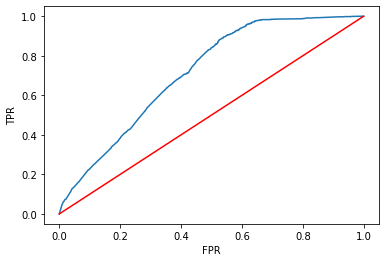


 Logistic Regression
Overall accuracy - train: 0.5873865649761213
Confusion matrix - train:  
 [[402445 264677]
 [285850 381272]]
AUC - train 0.6385266294385381


Classification report - train:  
               precision    recall  f1-score   support

           0       0.58      0.60      0.59    667122
           1       0.59      0.57      0.58    667122

    accuracy                           0.59   1334244
   macro avg       0.59      0.59      0.59   1334244
weighted avg       0.59      0.59      0.59   1334244



Overall accuracy - test: 0.603106685157181
Confusion matrix - test:  
 [[172479 113400]
 [   506    609]]
AUC - test 0.6322351202648265
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.60      0.75    285879
           1       0.01      0.55      0.01      1115

    accuracy                           0.60    286994
   macro avg       0.50      0.57      0.38    286994
weighted avg       0.99      0.6

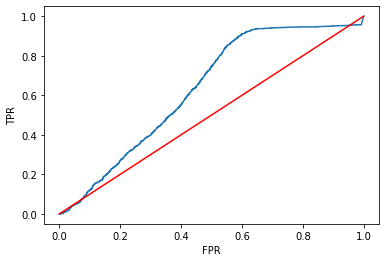


 Naive Bayes Classifier: Gaussian
Overall accuracy - train: 0.5721067510890062
Confusion matrix - train:  
 [[422442 244680]
 [326234 340888]]
AUC - train 0.6340307681660562


Classification report - train:  
               precision    recall  f1-score   support

           0       0.56      0.63      0.60    667122
           1       0.58      0.51      0.54    667122

    accuracy                           0.57   1334244
   macro avg       0.57      0.57      0.57   1334244
weighted avg       0.57      0.57      0.57   1334244



Overall accuracy - test: 0.6327937169418176
Confusion matrix - test:  
 [[181054 104825]
 [   561    554]]
AUC - test 0.6286414615158218
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.63      0.77    285879
           1       0.01      0.50      0.01      1115

    accuracy                           0.63    286994
   macro avg       0.50      0.57      0.39    286994
weighted avg      

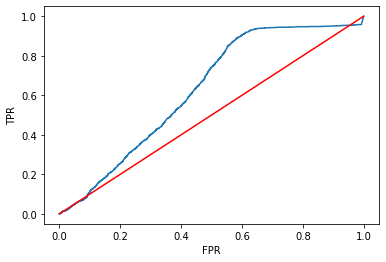


 Boosting : Adaboost
Overall accuracy - train: 0.6696263951720974
Confusion matrix - train:  
 [[268188 398934]
 [ 41865 625257]]
AUC - train 0.7127685952323284


Classification report - train:  
               precision    recall  f1-score   support

           0       0.86      0.40      0.55    667122
           1       0.61      0.94      0.74    667122

    accuracy                           0.67   1334244
   macro avg       0.74      0.67      0.64   1334244
weighted avg       0.74      0.67      0.64   1334244



Overall accuracy - test: 0.40478198150483985
Confusion matrix - test:  
 [[115112 170767]
 [    57   1058]]
AUC - test 0.7184887544617523
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.40      0.57    285879
           1       0.01      0.95      0.01      1115

    accuracy                           0.40    286994
   macro avg       0.50      0.68      0.29    286994
weighted avg       1.00      0

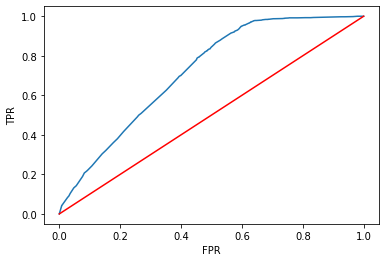


funds
before oversampling:  
 0    659830
1      9821
Name: funds, dtype: int64
after undersampling:  
 0    659830
1    659830
Name: funds, dtype: int64

 Decision Tree Classifier
Overall accuracy - train: 0.7377688192413198
Confusion matrix - train:  
 [[382011 277819]
 [ 68237 591593]]
AUC - train 0.8003797155341876


Classification report - train:  
               precision    recall  f1-score   support

           0       0.85      0.58      0.69    659830
           1       0.68      0.90      0.77    659830

    accuracy                           0.74   1319660
   macro avg       0.76      0.74      0.73   1319660
weighted avg       0.76      0.74      0.73   1319660



Overall accuracy - test: 0.5841028035429312
Confusion matrix - test:  
 [[163912 118962]
 [   398   3722]]
AUC - test 0.8000176542631661
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.58      0.73    282874
           1       0.03      0.90 

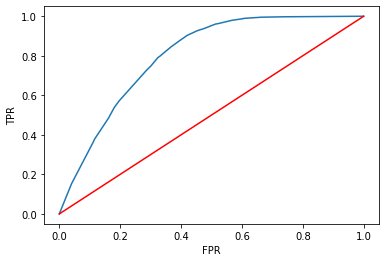


 Random Forest Classifier
Overall accuracy - train: 0.7386576845551127
Confusion matrix - train:  
 [[383437 276393]
 [ 68490 591340]]
AUC - train 0.8027767632620008


Classification report - train:  
               precision    recall  f1-score   support

           0       0.85      0.58      0.69    659830
           1       0.68      0.90      0.77    659830

    accuracy                           0.74   1319660
   macro avg       0.76      0.74      0.73   1319660
weighted avg       0.76      0.74      0.73   1319660



Overall accuracy - test: 0.5862875182059555
Confusion matrix - test:  
 [[164555 118319]
 [   414   3706]]
AUC - test 0.8024908513591869
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.58      0.73    282874
           1       0.03      0.90      0.06      4120

    accuracy                           0.59    286994
   macro avg       0.51      0.74      0.40    286994
weighted avg       0.98   

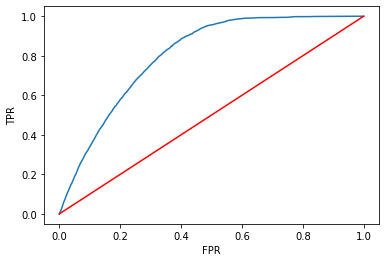


 Logistic Regression
Overall accuracy - train: 0.716775533091857
Confusion matrix - train:  
 [[466131 193699]
 [180061 479769]]
AUC - train 0.7819067926495966


Classification report - train:  
               precision    recall  f1-score   support

           0       0.72      0.71      0.71    659830
           1       0.71      0.73      0.72    659830

    accuracy                           0.72   1319660
   macro avg       0.72      0.72      0.72   1319660
weighted avg       0.72      0.72      0.72   1319660



Overall accuracy - test: 0.706722091751047
Confusion matrix - test:  
 [[199839  83035]
 [  1134   2986]]
AUC - test 0.7862426101785618
Classification report - test:  
               precision    recall  f1-score   support

           0       0.99      0.71      0.83    282874
           1       0.03      0.72      0.07      4120

    accuracy                           0.71    286994
   macro avg       0.51      0.72      0.45    286994
weighted avg       0.98      0.71

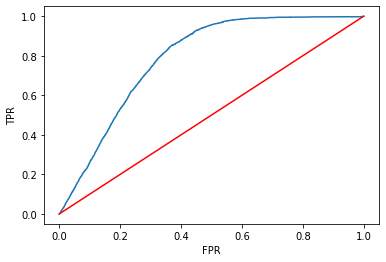


 Naive Bayes Classifier: Gaussian
Overall accuracy - train: 0.7068282739493505
Confusion matrix - train:  
 [[472574 187256]
 [199631 460199]]
AUC - train 0.7799250411774714


Classification report - train:  
               precision    recall  f1-score   support

           0       0.70      0.72      0.71    659830
           1       0.71      0.70      0.70    659830

    accuracy                           0.71   1319660
   macro avg       0.71      0.71      0.71   1319660
weighted avg       0.71      0.71      0.71   1319660



Overall accuracy - test: 0.7160637504616821
Confusion matrix - test:  
 [[202622  80252]
 [  1236   2884]]
AUC - test 0.7851115592409973
Classification report - test:  
               precision    recall  f1-score   support

           0       0.99      0.72      0.83    282874
           1       0.03      0.70      0.07      4120

    accuracy                           0.72    286994
   macro avg       0.51      0.71      0.45    286994
weighted avg      

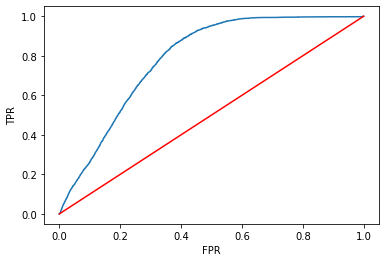


 Boosting : Adaboost
Overall accuracy - train: 0.7355788612218299
Confusion matrix - train:  
 [[405864 253966]
 [ 94980 564850]]
AUC - train 0.8002720076380923


Classification report - train:  
               precision    recall  f1-score   support

           0       0.81      0.62      0.70    659830
           1       0.69      0.86      0.76    659830

    accuracy                           0.74   1319660
   macro avg       0.75      0.74      0.73   1319660
weighted avg       0.75      0.74      0.73   1319660



Overall accuracy - test: 0.6193404740168784
Confusion matrix - test:  
 [[174196 108678]
 [   569   3551]]
AUC - test 0.8016260125524343
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.62      0.76    282874
           1       0.03      0.86      0.06      4120

    accuracy                           0.62    286994
   macro avg       0.51      0.74      0.41    286994
weighted avg       0.98      0.

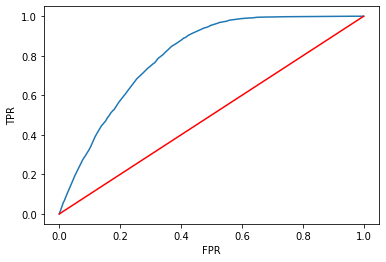


pensions
before oversampling:  
 0    664476
1      5175
Name: pensions, dtype: int64
after undersampling:  
 0    664476
1    664476
Name: pensions, dtype: int64

 Decision Tree Classifier
Overall accuracy - train: 0.7717916072213293
Confusion matrix - train:  
 [[421344 243132]
 [ 60146 604330]]
AUC - train 0.8322533424753104


Classification report - train:  
               precision    recall  f1-score   support

           0       0.88      0.63      0.74    664476
           1       0.71      0.91      0.80    664476

    accuracy                           0.77   1328952
   macro avg       0.79      0.77      0.77   1328952
weighted avg       0.79      0.77      0.77   1328952



Overall accuracy - test: 0.6365289866687108
Confusion matrix - test:  
 [[180608 104096]
 [   218   2072]]
AUC - test 0.8291785480533403
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.63      0.78    284704
           1       0.02  

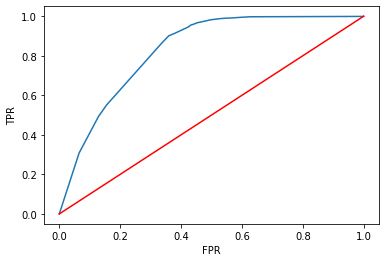


 Random Forest Classifier
Overall accuracy - train: 0.7717630132615776
Confusion matrix - train:  
 [[407460 257016]
 [ 46300 618176]]
AUC - train 0.8381935226433964


Classification report - train:  
               precision    recall  f1-score   support

           0       0.90      0.61      0.73    664476
           1       0.71      0.93      0.80    664476

    accuracy                           0.77   1328952
   macro avg       0.80      0.77      0.77   1328952
weighted avg       0.80      0.77      0.77   1328952



Overall accuracy - test: 0.6160233314982195
Confusion matrix - test:  
 [[174672 110032]
 [   167   2123]]
AUC - test 0.8355236449053285
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.61      0.76    284704
           1       0.02      0.93      0.04      2290

    accuracy                           0.62    286994
   macro avg       0.51      0.77      0.40    286994
weighted avg       0.99   

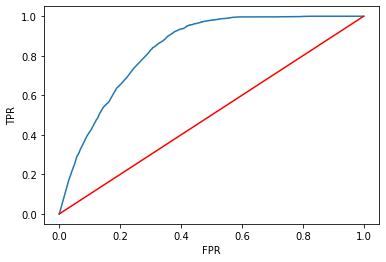


 Logistic Regression
Overall accuracy - train: 0.7212826347377482
Confusion matrix - train:  
 [[458620 205856]
 [164546 499930]]
AUC - train 0.7722812115417758


Classification report - train:  
               precision    recall  f1-score   support

           0       0.74      0.69      0.71    664476
           1       0.71      0.75      0.73    664476

    accuracy                           0.72   1328952
   macro avg       0.72      0.72      0.72   1328952
weighted avg       0.72      0.72      0.72   1328952



Overall accuracy - test: 0.6911085249168972
Confusion matrix - test:  
 [[196585  88119]
 [   531   1759]]
AUC - test 0.7740898867522197
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.69      0.82    284704
           1       0.02      0.77      0.04      2290

    accuracy                           0.69    286994
   macro avg       0.51      0.73      0.43    286994
weighted avg       0.99      0.

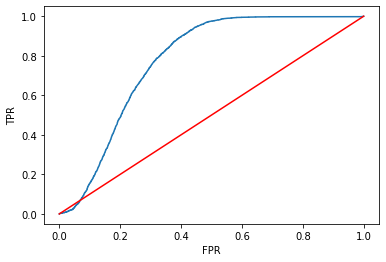


 Naive Bayes Classifier: Gaussian
Overall accuracy - train: 0.76426236613512
Confusion matrix - train:  
 [[441853 222623]
 [ 90661 573815]]
AUC - train 0.8277664424099624


Classification report - train:  
               precision    recall  f1-score   support

           0       0.83      0.66      0.74    664476
           1       0.72      0.86      0.79    664476

    accuracy                           0.76   1328952
   macro avg       0.78      0.76      0.76   1328952
weighted avg       0.78      0.76      0.76   1328952



Overall accuracy - test: 0.666689895956013
Confusion matrix - test:  
 [[189356  95348]
 [   310   1980]]
AUC - test 0.8291990941760459
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.67      0.80    284704
           1       0.02      0.86      0.04      2290

    accuracy                           0.67    286994
   macro avg       0.51      0.76      0.42    286994
weighted avg       0.

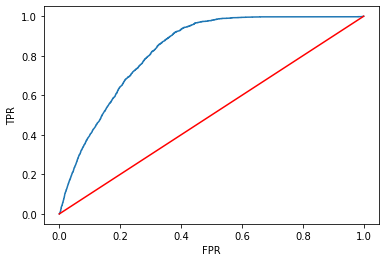


 Boosting : Adaboost
Overall accuracy - train: 0.7695627833059433
Confusion matrix - train:  
 [[432447 232029]
 [ 74211 590265]]
AUC - train 0.837780235466913


Classification report - train:  
               precision    recall  f1-score   support

           0       0.85      0.65      0.74    664476
           1       0.72      0.89      0.79    664476

    accuracy                           0.77   1328952
   macro avg       0.79      0.77      0.77   1328952
weighted avg       0.79      0.77      0.77   1328952



Overall accuracy - test: 0.6532784657518973
Confusion matrix - test:  
 [[185450  99254]
 [   253   2037]]
AUC - test 0.8372930448441235
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.65      0.79    284704
           1       0.02      0.89      0.04      2290

    accuracy                           0.65    286994
   macro avg       0.51      0.77      0.41    286994
weighted avg       0.99      0.6

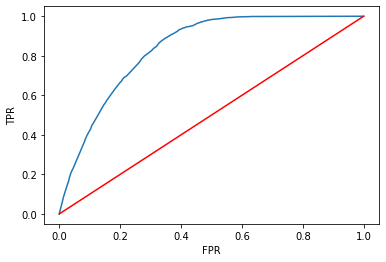


loans
before oversampling:  
 0    667999
1      1652
Name: loans, dtype: int64
after undersampling:  
 0    667999
1    667999
Name: loans, dtype: int64

 Decision Tree Classifier
Overall accuracy - train: 0.7272997414666789
Confusion matrix - train:  
 [[371955 296044]
 [ 68283 599716]]
AUC - train 0.8041319754921635


Classification report - train:  
               precision    recall  f1-score   support

           0       0.84      0.56      0.67    667999
           1       0.67      0.90      0.77    667999

    accuracy                           0.73   1335998
   macro avg       0.76      0.73      0.72   1335998
weighted avg       0.76      0.73      0.72   1335998



Overall accuracy - test: 0.5577363986703555
Confusion matrix - test:  
 [[159446 126843]
 [    84    621]]
AUC - test 0.7948965843149768
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.56      0.72    286289
           1       0.00      0.88 

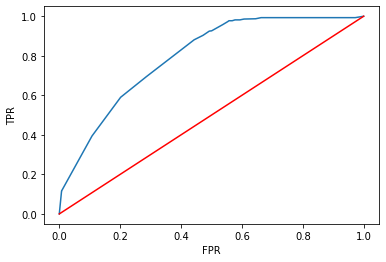


 Random Forest Classifier
Overall accuracy - train: 0.7305310337290924
Confusion matrix - train:  
 [[375418 292581]
 [ 67429 600570]]
AUC - train 0.8106230826258287


Classification report - train:  
               precision    recall  f1-score   support

           0       0.85      0.56      0.68    667999
           1       0.67      0.90      0.77    667999

    accuracy                           0.73   1335998
   macro avg       0.76      0.73      0.72   1335998
weighted avg       0.76      0.73      0.72   1335998



Overall accuracy - test: 0.562266110092894
Confusion matrix - test:  
 [[160754 125535]
 [    92    613]]
AUC - test 0.8003390265587155
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.56      0.72    286289
           1       0.00      0.87      0.01       705

    accuracy                           0.56    286994
   macro avg       0.50      0.72      0.36    286994
weighted avg       1.00    

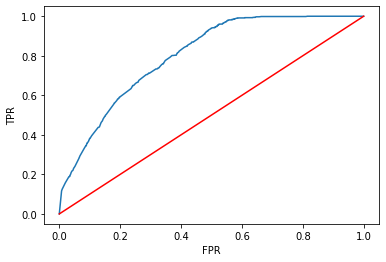


 Logistic Regression
Overall accuracy - train: 0.6266835728796001
Confusion matrix - train:  
 [[400189 267810]
 [230940 437059]]
AUC - train 0.617625395809977


Classification report - train:  
               precision    recall  f1-score   support

           0       0.63      0.60      0.62    667999
           1       0.62      0.65      0.64    667999

    accuracy                           0.63   1335998
   macro avg       0.63      0.63      0.63   1335998
weighted avg       0.63      0.63      0.63   1335998



Overall accuracy - test: 0.5979672048893008
Confusion matrix - test:  
 [[171170 115119]
 [   262    443]]
AUC - test 0.6036162411790952
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.60      0.75    286289
           1       0.00      0.63      0.01       705

    accuracy                           0.60    286994
   macro avg       0.50      0.61      0.38    286994
weighted avg       1.00      0.6

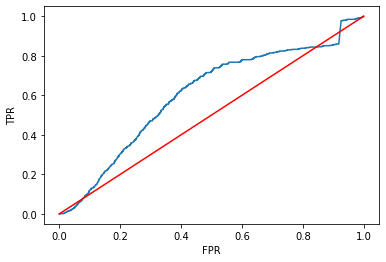


 Naive Bayes Classifier: Gaussian
Overall accuracy - train: 0.522346590339207
Confusion matrix - train:  
 [[ 59170 608829]
 [ 29315 638684]]
AUC - train 0.6287011777832319


Classification report - train:  
               precision    recall  f1-score   support

           0       0.67      0.09      0.16    667999
           1       0.51      0.96      0.67    667999

    accuracy                           0.52   1335998
   macro avg       0.59      0.52      0.41   1335998
weighted avg       0.59      0.52      0.41   1335998



Overall accuracy - test: 0.09069179146602369
Confusion matrix - test:  
 [[ 25360 260929]
 [    37    668]]
AUC - test 0.621640585918871
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.09      0.16    286289
           1       0.00      0.95      0.01       705

    accuracy                           0.09    286994
   macro avg       0.50      0.52      0.08    286994
weighted avg       

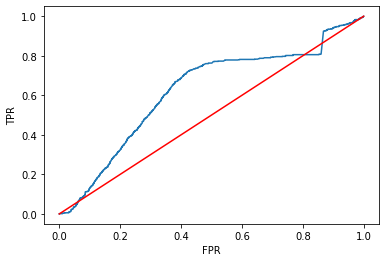


 Boosting : Adaboost
Overall accuracy - train: 0.7278439039579401
Confusion matrix - train:  
 [[362406 305593]
 [ 58007 609992]]
AUC - train 0.8064366376540515


Classification report - train:  
               precision    recall  f1-score   support

           0       0.86      0.54      0.67    667999
           1       0.67      0.91      0.77    667999

    accuracy                           0.73   1335998
   macro avg       0.76      0.73      0.72   1335998
weighted avg       0.76      0.73      0.72   1335998



Overall accuracy - test: 0.5431193683491641
Confusion matrix - test:  
 [[155254 131035]
 [    87    618]]
AUC - test 0.7976662178071362
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.54      0.70    286289
           1       0.00      0.88      0.01       705

    accuracy                           0.54    286994
   macro avg       0.50      0.71      0.36    286994
weighted avg       1.00      0.

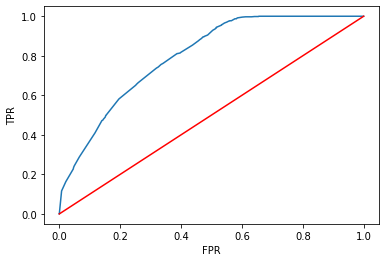


taxes
before oversampling:  
 0    642734
1     26917
Name: taxes, dtype: int64
after undersampling:  
 0    642734
1    642734
Name: taxes, dtype: int64

 Decision Tree Classifier
Overall accuracy - train: 0.712860996928745
Confusion matrix - train:  
 [[390530 252204]
 [116904 525830]]
AUC - train 0.7794520192745376


Classification report - train:  
               precision    recall  f1-score   support

           0       0.77      0.61      0.68    642734
           1       0.68      0.82      0.74    642734

    accuracy                           0.71   1285468
   macro avg       0.72      0.71      0.71   1285468
weighted avg       0.72      0.71      0.71   1285468



Overall accuracy - test: 0.6168317107674725
Confusion matrix - test:  
 [[167686 107897]
 [  2070   9341]]
AUC - test 0.7775090942207817
Classification report - test:  
               precision    recall  f1-score   support

           0       0.99      0.61      0.75    275583
           1       0.08      0.82  

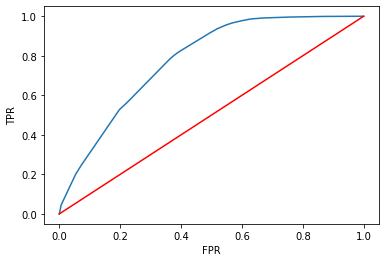


 Random Forest Classifier
Overall accuracy - train: 0.7134172145864386
Confusion matrix - train:  
 [[375156 267578]
 [100815 541919]]
AUC - train 0.78411007676915


Classification report - train:  
               precision    recall  f1-score   support

           0       0.79      0.58      0.67    642734
           1       0.67      0.84      0.75    642734

    accuracy                           0.71   1285468
   macro avg       0.73      0.71      0.71   1285468
weighted avg       0.73      0.71      0.71   1285468



Overall accuracy - test: 0.5950124392844449
Confusion matrix - test:  
 [[161142 114441]
 [  1788   9623]]
AUC - test 0.7827071790522522
Classification report - test:  
               precision    recall  f1-score   support

           0       0.99      0.58      0.73    275583
           1       0.08      0.84      0.14     11411

    accuracy                           0.60    286994
   macro avg       0.53      0.71      0.44    286994
weighted avg       0.95     

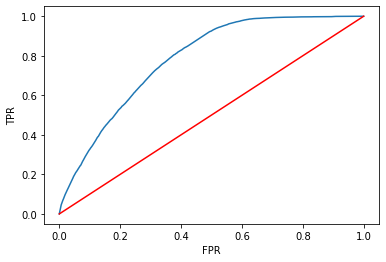


 Logistic Regression
Overall accuracy - train: 0.6318399213360426
Confusion matrix - train:  
 [[414834 227900]
 [245358 397376]]
AUC - train 0.6774870093891943


Classification report - train:  
               precision    recall  f1-score   support

           0       0.63      0.65      0.64    642734
           1       0.64      0.62      0.63    642734

    accuracy                           0.63   1285468
   macro avg       0.63      0.63      0.63   1285468
weighted avg       0.63      0.63      0.63   1285468



Overall accuracy - test: 0.6439472602214681
Confusion matrix - test:  
 [[177847  97736]
 [  4449   6962]]
AUC - test 0.6736306220207762
Classification report - test:  
               precision    recall  f1-score   support

           0       0.98      0.65      0.78    275583
           1       0.07      0.61      0.12     11411

    accuracy                           0.64    286994
   macro avg       0.52      0.63      0.45    286994
weighted avg       0.94      0.

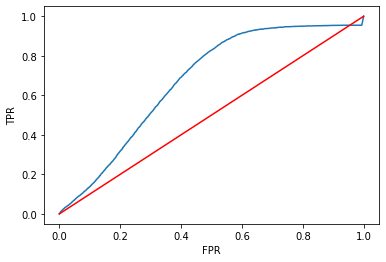


 Naive Bayes Classifier: Gaussian
Overall accuracy - train: 0.5362848394514682
Confusion matrix - train:  
 [[612656  30078]
 [566013  76721]]
AUC - train 0.690206082685456


Classification report - train:  
               precision    recall  f1-score   support

           0       0.52      0.95      0.67    642734
           1       0.72      0.12      0.20    642734

    accuracy                           0.54   1285468
   macro avg       0.62      0.54      0.44   1285468
weighted avg       0.62      0.54      0.44   1285468



Overall accuracy - test: 0.919928639623128
Confusion matrix - test:  
 [[262667  12916]
 [ 10064   1347]]
AUC - test 0.6872737779432273
Classification report - test:  
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    275583
           1       0.09      0.12      0.10     11411

    accuracy                           0.92    286994
   macro avg       0.53      0.54      0.53    286994
weighted avg       0

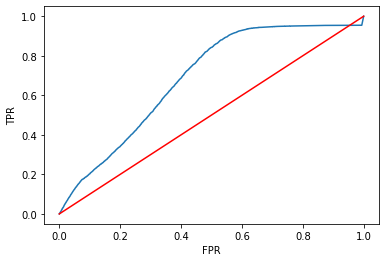


 Boosting : Adaboost
Overall accuracy - train: 0.712184200617985
Confusion matrix - train:  
 [[395706 247028]
 [122950 519784]]
AUC - train 0.7832124084877911


Classification report - train:  
               precision    recall  f1-score   support

           0       0.76      0.62      0.68    642734
           1       0.68      0.81      0.74    642734

    accuracy                           0.71   1285468
   macro avg       0.72      0.71      0.71   1285468
weighted avg       0.72      0.71      0.71   1285468



Overall accuracy - test: 0.6244625323177488
Confusion matrix - test:  
 [[169961 105622]
 [  2155   9256]]
AUC - test 0.7828294888872604
Classification report - test:  
               precision    recall  f1-score   support

           0       0.99      0.62      0.76    275583
           1       0.08      0.81      0.15     11411

    accuracy                           0.62    286994
   macro avg       0.53      0.71      0.45    286994
weighted avg       0.95      0.6

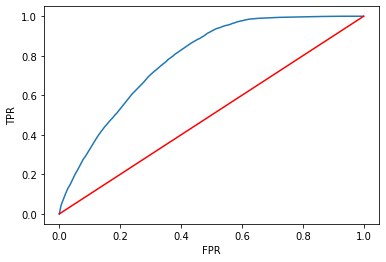


credit_card
before oversampling:  
 0    644627
1     25024
Name: credit_card, dtype: int64
after undersampling:  
 0    644627
1    644627
Name: credit_card, dtype: int64

 Decision Tree Classifier
Overall accuracy - train: 0.7191499890634429
Confusion matrix - train:  
 [[339881 304746]
 [ 57341 587286]]
AUC - train 0.7721654603423943


Classification report - train:  
               precision    recall  f1-score   support

           0       0.86      0.53      0.65    644627
           1       0.66      0.91      0.76    644627

    accuracy                           0.72   1289254
   macro avg       0.76      0.72      0.71   1289254
weighted avg       0.76      0.72      0.71   1289254



Overall accuracy - test: 0.5428580388440176
Confusion matrix - test:  
 [[145785 130252]
 [   945  10012]]
AUC - test 0.7733112587862856
Classification report - test:  
               precision    recall  f1-score   support

           0       0.99      0.53      0.69    276037
           1    

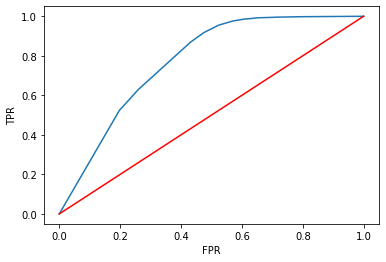


 Random Forest Classifier
Overall accuracy - train: 0.719356309928067
Confusion matrix - train:  
 [[321466 323161]
 [ 38660 605967]]
AUC - train 0.7787680590403152


Classification report - train:  
               precision    recall  f1-score   support

           0       0.89      0.50      0.64    644627
           1       0.65      0.94      0.77    644627

    accuracy                           0.72   1289254
   macro avg       0.77      0.72      0.70   1289254
weighted avg       0.77      0.72      0.70   1289254



Overall accuracy - test: 0.5167564478699903
Confusion matrix - test:  
 [[138001 138036]
 [   652  10305]]
AUC - test 0.7792029751350318
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.50      0.67    276037
           1       0.07      0.94      0.13     10957

    accuracy                           0.52    286994
   macro avg       0.53      0.72      0.40    286994
weighted avg       0.96    

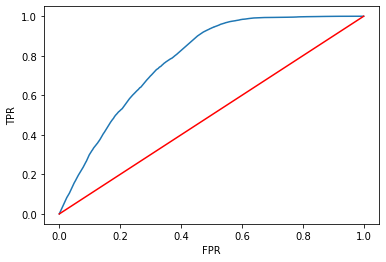


 Logistic Regression
Overall accuracy - train: 0.6544412505216195
Confusion matrix - train:  
 [[418286 226341]
 [219172 425455]]
AUC - train 0.7110440975977088


Classification report - train:  
               precision    recall  f1-score   support

           0       0.66      0.65      0.65    644627
           1       0.65      0.66      0.66    644627

    accuracy                           0.65   1289254
   macro avg       0.65      0.65      0.65   1289254
weighted avg       0.65      0.65      0.65   1289254



Overall accuracy - test: 0.6503899036216785
Confusion matrix - test:  
 [[179303  96734]
 [  3602   7355]]
AUC - test 0.7153562716935797
Classification report - test:  
               precision    recall  f1-score   support

           0       0.98      0.65      0.78    276037
           1       0.07      0.67      0.13     10957

    accuracy                           0.65    286994
   macro avg       0.53      0.66      0.45    286994
weighted avg       0.95      0.

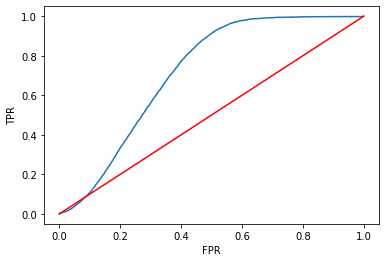


 Naive Bayes Classifier: Gaussian
Overall accuracy - train: 0.6915890895044732
Confusion matrix - train:  
 [[423867 220760]
 [176860 467767]]
AUC - train 0.7586250198041915


Classification report - train:  
               precision    recall  f1-score   support

           0       0.71      0.66      0.68    644627
           1       0.68      0.73      0.70    644627

    accuracy                           0.69   1289254
   macro avg       0.69      0.69      0.69   1289254
weighted avg       0.69      0.69      0.69   1289254



Overall accuracy - test: 0.6609720063834087
Confusion matrix - test:  
 [[181625  94412]
 [  2887   8070]]
AUC - test 0.7631217911644617
Classification report - test:  
               precision    recall  f1-score   support

           0       0.98      0.66      0.79    276037
           1       0.08      0.74      0.14     10957

    accuracy                           0.66    286994
   macro avg       0.53      0.70      0.47    286994
weighted avg      

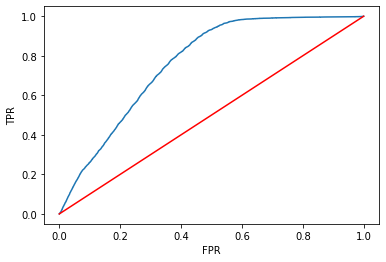


 Boosting : Adaboost
Overall accuracy - train: 0.7194540408639415
Confusion matrix - train:  
 [[360861 283766]
 [ 77929 566698]]
AUC - train 0.7803213810494228


Classification report - train:  
               precision    recall  f1-score   support

           0       0.82      0.56      0.67    644627
           1       0.67      0.88      0.76    644627

    accuracy                           0.72   1289254
   macro avg       0.74      0.72      0.71   1289254
weighted avg       0.74      0.72      0.71   1289254



Overall accuracy - test: 0.5732210429486331
Confusion matrix - test:  
 [[154843 121194]
 [  1289   9668]]
AUC - test 0.7824769305076895
Classification report - test:  
               precision    recall  f1-score   support

           0       0.99      0.56      0.72    276037
           1       0.07      0.88      0.14     10957

    accuracy                           0.57    286994
   macro avg       0.53      0.72      0.43    286994
weighted avg       0.96      0.

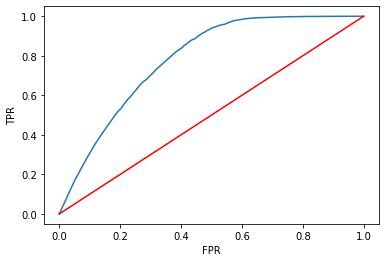


securities
before oversampling:  
 0    655372
1     14279
Name: securities, dtype: int64
after undersampling:  
 0    655372
1    655372
Name: securities, dtype: int64

 Decision Tree Classifier
Overall accuracy - train: 0.7243824881136209
Confusion matrix - train:  
 [[354910 300462]
 [ 60802 594570]]
AUC - train 0.7852256751606803


Classification report - train:  
               precision    recall  f1-score   support

           0       0.85      0.54      0.66    655372
           1       0.66      0.91      0.77    655372

    accuracy                           0.72   1310744
   macro avg       0.76      0.72      0.71   1310744
weighted avg       0.76      0.72      0.71   1310744



Overall accuracy - test: 0.5495829181097863
Confusion matrix - test:  
 [[152276 128654]
 [   613   5451]]
AUC - test 0.7779499659043319
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.54      0.70    280930
           1       

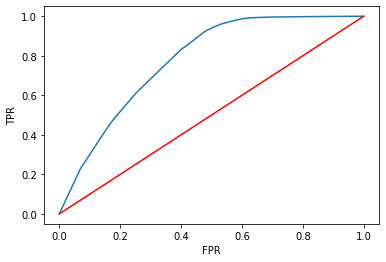


 Random Forest Classifier
Overall accuracy - train: 0.7250462332843026
Confusion matrix - train:  
 [[351762 303610]
 [ 56784 598588]]
AUC - train 0.7881050994063777


Classification report - train:  
               precision    recall  f1-score   support

           0       0.86      0.54      0.66    655372
           1       0.66      0.91      0.77    655372

    accuracy                           0.73   1310744
   macro avg       0.76      0.73      0.71   1310744
weighted avg       0.76      0.73      0.71   1310744



Overall accuracy - test: 0.5450880506212673
Confusion matrix - test:  
 [[150944 129986]
 [   571   5493]]
AUC - test 0.780019431314029
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.54      0.70    280930
           1       0.04      0.91      0.08      6064

    accuracy                           0.55    286994
   macro avg       0.52      0.72      0.39    286994
weighted avg       0.98    

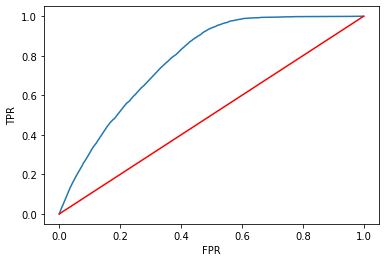


 Logistic Regression
Overall accuracy - train: 0.6896548830282648
Confusion matrix - train:  
 [[449465 205907]
 [200876 454496]]
AUC - train 0.7557796180647236


Classification report - train:  
               precision    recall  f1-score   support

           0       0.69      0.69      0.69    655372
           1       0.69      0.69      0.69    655372

    accuracy                           0.69   1310744
   macro avg       0.69      0.69      0.69   1310744
weighted avg       0.69      0.69      0.69   1310744



Overall accuracy - test: 0.6855125891133612
Confusion matrix - test:  
 [[192618  88312]
 [  1944   4120]]
AUC - test 0.7515822452742948
Classification report - test:  
               precision    recall  f1-score   support

           0       0.99      0.69      0.81    280930
           1       0.04      0.68      0.08      6064

    accuracy                           0.69    286994
   macro avg       0.52      0.68      0.45    286994
weighted avg       0.97      0.

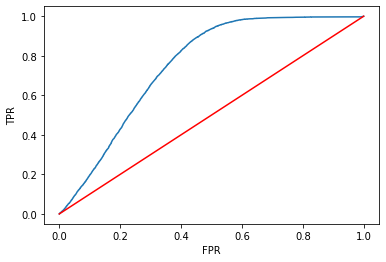


 Naive Bayes Classifier: Gaussian
Overall accuracy - train: 0.7183431699859011
Confusion matrix - train:  
 [[386699 268673]
 [100507 554865]]
AUC - train 0.7594697349846453


Classification report - train:  
               precision    recall  f1-score   support

           0       0.79      0.59      0.68    655372
           1       0.67      0.85      0.75    655372

    accuracy                           0.72   1310744
   macro avg       0.73      0.72      0.71   1310744
weighted avg       0.73      0.72      0.71   1310744



Overall accuracy - test: 0.5955908485891691
Confusion matrix - test:  
 [[165842 115088]
 [   975   5089]]
AUC - test 0.7546279562923636
Classification report - test:  
               precision    recall  f1-score   support

           0       0.99      0.59      0.74    280930
           1       0.04      0.84      0.08      6064

    accuracy                           0.60    286994
   macro avg       0.52      0.71      0.41    286994
weighted avg      

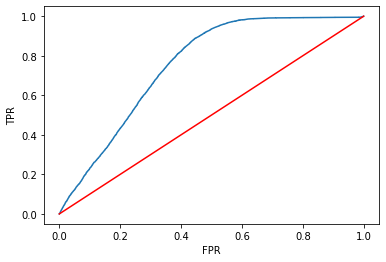


 Boosting : Adaboost
Overall accuracy - train: 0.7245259181045269
Confusion matrix - train:  
 [[363993 291379]
 [ 69697 585675]]
AUC - train 0.7867506344749324


Classification report - train:  
               precision    recall  f1-score   support

           0       0.84      0.56      0.67    655372
           1       0.67      0.89      0.76    655372

    accuracy                           0.72   1310744
   macro avg       0.75      0.72      0.72   1310744
weighted avg       0.75      0.72      0.72   1310744



Overall accuracy - test: 0.5631267552631762
Confusion matrix - test:  
 [[156247 124683]
 [   697   5367]]
AUC - test 0.7801771634019573
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.56      0.71    280930
           1       0.04      0.89      0.08      6064

    accuracy                           0.56    286994
   macro avg       0.52      0.72      0.40    286994
weighted avg       0.98      0.

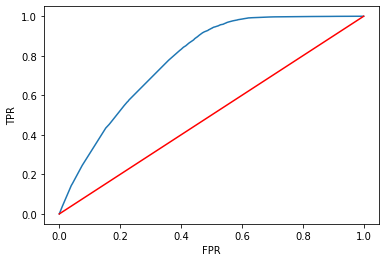


home_account
before oversampling:  
 0    667433
1      2218
Name: home_account, dtype: int64
after undersampling:  
 0    667433
1    667433
Name: home_account, dtype: int64

 Decision Tree Classifier
Overall accuracy - train: 0.7685310735309762
Confusion matrix - train:  
 [[440064 227369]
 [ 81611 585822]]
AUC - train 0.8339859619949392


Classification report - train:  
               precision    recall  f1-score   support

           0       0.84      0.66      0.74    667433
           1       0.72      0.88      0.79    667433

    accuracy                           0.77   1334866
   macro avg       0.78      0.77      0.77   1334866
weighted avg       0.78      0.77      0.77   1334866



Overall accuracy - test: 0.6609580688098009
Confusion matrix - test:  
 [[188801  97177]
 [   126    890]]
AUC - test 0.8296668572545336
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.66      0.80    285978
           1 

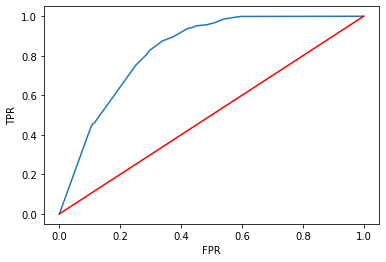


 Random Forest Classifier
Overall accuracy - train: 0.7723292075758915
Confusion matrix - train:  
 [[418797 248636]
 [ 55274 612159]]
AUC - train 0.8423768379836301


Classification report - train:  
               precision    recall  f1-score   support

           0       0.88      0.63      0.73    667433
           1       0.71      0.92      0.80    667433

    accuracy                           0.77   1334866
   macro avg       0.80      0.77      0.77   1334866
weighted avg       0.80      0.77      0.77   1334866



Overall accuracy - test: 0.6296264033394426
Confusion matrix - test:  
 [[179779 106199]
 [    96    920]]
AUC - test 0.8369038856466191
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.63      0.77    285978
           1       0.01      0.91      0.02      1016

    accuracy                           0.63    286994
   macro avg       0.50      0.77      0.39    286994
weighted avg       1.00   

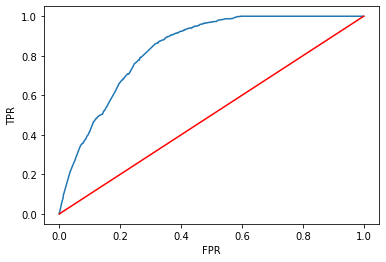


 Logistic Regression
Overall accuracy - train: 0.6203102034211674
Confusion matrix - train:  
 [[430320 237113]
 [269722 397711]]
AUC - train 0.6847246648204708


Classification report - train:  
               precision    recall  f1-score   support

           0       0.61      0.64      0.63    667433
           1       0.63      0.60      0.61    667433

    accuracy                           0.62   1334866
   macro avg       0.62      0.62      0.62   1334866
weighted avg       0.62      0.62      0.62   1334866



Overall accuracy - test: 0.6449089528004069
Confusion matrix - test:  
 [[184495 101483]
 [   426    590]]
AUC - test 0.6749252224153799
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.65      0.78    285978
           1       0.01      0.58      0.01      1016

    accuracy                           0.64    286994
   macro avg       0.50      0.61      0.40    286994
weighted avg       0.99      0.

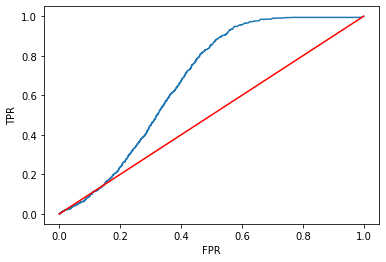


 Naive Bayes Classifier: Gaussian
Overall accuracy - train: 0.7601339759945942
Confusion matrix - train:  
 [[399317 268116]
 [ 52073 615360]]
AUC - train 0.8075349688356139


Classification report - train:  
               precision    recall  f1-score   support

           0       0.88      0.60      0.71    667433
           1       0.70      0.92      0.79    667433

    accuracy                           0.76   1334866
   macro avg       0.79      0.76      0.75   1334866
weighted avg       0.79      0.76      0.75   1334866



Overall accuracy - test: 0.6002111542401584
Confusion matrix - test:  
 [[171311 114667]
 [    70    946]]
AUC - test 0.807901708052208
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.60      0.75    285978
           1       0.01      0.93      0.02      1016

    accuracy                           0.60    286994
   macro avg       0.50      0.77      0.38    286994
weighted avg       

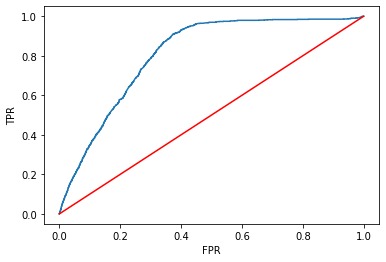


 Boosting : Adaboost
Overall accuracy - train: 0.7709170808156025
Confusion matrix - train:  
 [[435975 231458]
 [ 74337 593096]]
AUC - train 0.8399571038215351


Classification report - train:  
               precision    recall  f1-score   support

           0       0.85      0.65      0.74    667433
           1       0.72      0.89      0.80    667433

    accuracy                           0.77   1334866
   macro avg       0.79      0.77      0.77   1334866
weighted avg       0.79      0.77      0.77   1334866



Overall accuracy - test: 0.6553307734656474
Confusion matrix - test:  
 [[187173  98805]
 [   113    903]]
AUC - test 0.8415325041797446
Classification report - test:  
               precision    recall  f1-score   support

           0       1.00      0.65      0.79    285978
           1       0.01      0.89      0.02      1016

    accuracy                           0.66    286994
   macro avg       0.50      0.77      0.40    286994
weighted avg       1.00      0.

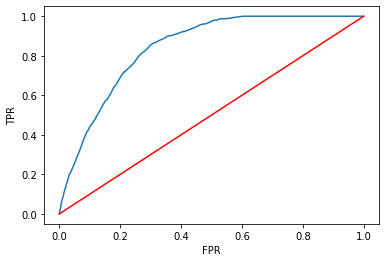


direct_debit
before oversampling:  
 0    601953
1     67698
Name: direct_debit, dtype: int64
after undersampling:  
 0    601953
1    601953
Name: direct_debit, dtype: int64

 Decision Tree Classifier
Overall accuracy - train: 0.682847331934553
Confusion matrix - train:  
 [[327599 274354]
 [107468 494485]]
AUC - train 0.7299414224077841


Classification report - train:  
               precision    recall  f1-score   support

           0       0.75      0.54      0.63    601953
           1       0.64      0.82      0.72    601953

    accuracy                           0.68   1203906
   macro avg       0.70      0.68      0.68   1203906
weighted avg       0.70      0.68      0.68   1203906



Overall accuracy - test: 0.5726112741032914
Confusion matrix - test:  
 [[140347 117354]
 [  5304  23989]]
AUC - test 0.7286299596094531
Classification report - test:  
               precision    recall  f1-score   support

           0       0.96      0.54      0.70    257701
           1  

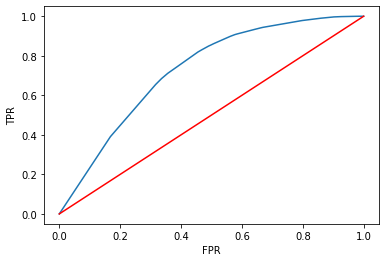


 Random Forest Classifier
Overall accuracy - train: 0.6800464488091263
Confusion matrix - train:  
 [[363480 238473]
 [146721 455232]]
AUC - train 0.7331300672888914


Classification report - train:  
               precision    recall  f1-score   support

           0       0.71      0.60      0.65    601953
           1       0.66      0.76      0.70    601953

    accuracy                           0.68   1203906
   macro avg       0.68      0.68      0.68   1203906
weighted avg       0.68      0.68      0.68   1203906



Overall accuracy - test: 0.6193648647706921
Confusion matrix - test:  
 [[155682 102019]
 [  7221  22072]]
AUC - test 0.7316565515684177
Classification report - test:  
               precision    recall  f1-score   support

           0       0.96      0.60      0.74    257701
           1       0.18      0.75      0.29     29293

    accuracy                           0.62    286994
   macro avg       0.57      0.68      0.51    286994
weighted avg       0.88   

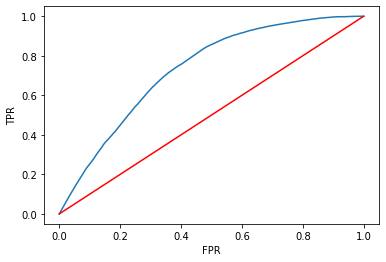


 Logistic Regression
Overall accuracy - train: 0.6018094435944334
Confusion matrix - train:  
 [[373672 228281]
 [251103 350850]]
AUC - train 0.6477529321642119


Classification report - train:  
               precision    recall  f1-score   support

           0       0.60      0.62      0.61    601953
           1       0.61      0.58      0.59    601953

    accuracy                           0.60   1203906
   macro avg       0.60      0.60      0.60   1203906
weighted avg       0.60      0.60      0.60   1203906



Overall accuracy - test: 0.6183369687171161
Confusion matrix - test:  
 [[160245  97456]
 [ 12079  17214]]
AUC - test 0.6493733744738444
Classification report - test:  
               precision    recall  f1-score   support

           0       0.93      0.62      0.75    257701
           1       0.15      0.59      0.24     29293

    accuracy                           0.62    286994
   macro avg       0.54      0.60      0.49    286994
weighted avg       0.85      0.

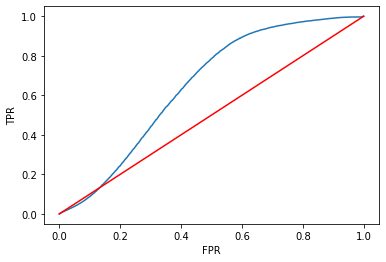


 Naive Bayes Classifier: Gaussian
Overall accuracy - train: 0.6544530885301676
Confusion matrix - train:  
 [[359002 242951]
 [173055 428898]]
AUC - train 0.7063181246917345


Classification report - train:  
               precision    recall  f1-score   support

           0       0.67      0.60      0.63    601953
           1       0.64      0.71      0.67    601953

    accuracy                           0.65   1203906
   macro avg       0.66      0.65      0.65   1203906
weighted avg       0.66      0.65      0.65   1203906



Overall accuracy - test: 0.6095284221969798
Confusion matrix - test:  
 [[154023 103678]
 [  8385  20908]]
AUC - test 0.707561457553165
Classification report - test:  
               precision    recall  f1-score   support

           0       0.95      0.60      0.73    257701
           1       0.17      0.71      0.27     29293

    accuracy                           0.61    286994
   macro avg       0.56      0.66      0.50    286994
weighted avg       

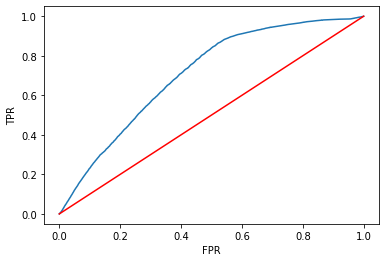


 Boosting : Adaboost
Overall accuracy - train: 0.6819751708189842
Confusion matrix - train:  
 [[355984 245969]
 [136903 465050]]
AUC - train 0.7329322339632238


Classification report - train:  
               precision    recall  f1-score   support

           0       0.72      0.59      0.65    601953
           1       0.65      0.77      0.71    601953

    accuracy                           0.68   1203906
   macro avg       0.69      0.68      0.68   1203906
weighted avg       0.69      0.68      0.68   1203906



Overall accuracy - test: 0.6101834881565468
Confusion matrix - test:  
 [[152583 105118]
 [  6757  22536]]
AUC - test 0.7324020890860614
Classification report - test:  
               precision    recall  f1-score   support

           0       0.96      0.59      0.73    257701
           1       0.18      0.77      0.29     29293

    accuracy                           0.61    286994
   macro avg       0.57      0.68      0.51    286994
weighted avg       0.88      0.

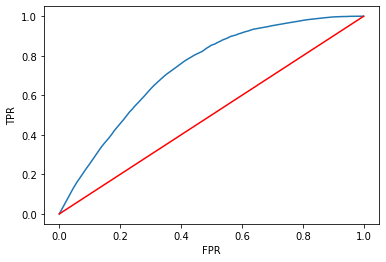

In [7]:
def model_eval(algo, Xtrains, y_train_os, Xtests, y_test):
    algo.fit(Xtrains,y_train_os)
    ytrain_pred = algo.predict(Xtrains)
    ytrain_prob = algo.predict_proba(Xtrains)[:,1]

    print('Overall accuracy - train:' , accuracy_score(y_train_os, ytrain_pred))
    print('Confusion matrix - train: ','\n',confusion_matrix(y_train_os,ytrain_pred))
    print('AUC - train', roc_auc_score(y_train_os,ytrain_prob))
    print('\n')
    print('Classification report - train: ','\n',classification_report(y_train_os,ytrain_pred))

    ytest_pred = algo.predict(Xtests)
    ytest_prob = algo.predict_proba(Xtests)[:,1]

    print('\n')
    print('Overall accuracy - test:' , accuracy_score(y_test, ytest_pred))
    print('Confusion matrix - test: ','\n',confusion_matrix(y_test,ytest_pred))
    print('AUC - test', roc_auc_score(y_test,ytest_prob))
    print('Classification report - test: ','\n',classification_report(y_test,ytest_pred))

    fpr,tpr,thresholds = roc_curve(y_test,ytest_prob)
    plt.plot(fpr,tpr)
    plt.plot(fpr,fpr,'r')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

# loop for all accounts
accounts = [
        'saving_account', 'guarantees', 'current_accounts', 'derivada_account',
        'payroll_account', 'junior_account', 'medium_term_deposit',
        'medium_term_deposit_2', 'long_term_deposit',
        'particular_plus_account', 'short_term_deposit', 'funds', 'pensions', 'loans', 'taxes', 'credit_card',
        'securities', 'home_account', 'direct_debit'
    ]
for acc in accounts:
    print()
    print(acc)
    new_df = df[['age', 'gross_income', acc]].copy()

    X=new_df.drop(acc,axis=1)
    y=new_df[acc]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
    
    # Imbalanced data treatment :Over sampling minority class
    Xytrain = pd.concat([X_train,y_train],axis=1)

    print('before oversampling: ','\n', Xytrain[acc].value_counts())
    Xytrain0 = Xytrain[Xytrain[acc]==0]
    Xytrain1 = Xytrain[Xytrain[acc]==1]

    len0 = len(Xytrain0)
    len1 = len(Xytrain1)

    Xytrain1_os = Xytrain1.sample(len0,replace = True, random_state=3)
    Xytrain_os = pd.concat([Xytrain0, Xytrain1_os],axis=0)

    print('after undersampling: ','\n',Xytrain_os[acc].value_counts())

    y_train_os = Xytrain_os[acc]
    X_train_os = Xytrain_os.drop(acc,axis=1)
    
    # Standardizing data
    ss = StandardScaler()

    Xtrains = ss.fit_transform(X_train_os)
    Xtests = ss.transform(X_test)
    
    #Decision Tree Classifier
    print('\n Decision Tree Classifier')
    dt=DecisionTreeClassifier(max_depth = 5, criterion = 'gini',random_state=3)
    model_eval(dt, Xtrains, y_train_os, Xtests, y_test)
    
    # Random Forest Classifier
    print('\n Random Forest Classifier')
    rf = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5,random_state=3)
    model_eval(rf, Xtrains, y_train_os, Xtests, y_test)
    
    #Logistic Regression
    print('\n Logistic Regression')
    lr=LogisticRegression(solver='liblinear', fit_intercept=True,random_state=3)
    model_eval(lr, Xtrains, y_train_os, Xtests, y_test)
    
    # Naive Bayes Classifier: Gaussian
    print('\n Naive Bayes Classifier: Gaussian')
    clf = GaussianNB()
    model_eval(clf, Xtrains, y_train_os, Xtests, y_test)
    
    # Boosting : Adaboost
    print('\n Boosting : Adaboost')
    ada = AdaBoostClassifier(random_state = 3)
    model_eval(ada, Xtrains, y_train_os, Xtests, y_test)
    

**Model Recommendation**
1. Ada-Boosting Classifier - It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method.

2. GaussianNB- It's specifically used when the features have continuous values. It's also assumed that all the features are following a gaussian distribution.

3. RandomForest Classifier - The algorithm uses randomness to build each individual tree to promote uncorrelated forests, which then uses the forest's predictive powers to make accurate decisions.

4. Decision Tree Classifier - On each step or node of a decision tree, used for classification, we try to form a condition on the features to separate all the labels or classes contained in the dataset to the fullest purity.

5. Logit Regression - Logistic regression analysis is used to examine the association of (categorical or continuous) independent variable(s) with one dichotomous dependent variable.

After running all five models it was concluded that the Ada-Boosting model is the best one for predicting what type of accounts to recommend to users based on age and gross income. The Ada-Boosting Model provided the highest level of accuracy for the dataframe.